In [1]:
import os

In [2]:
# importing necessary packages

import pandas as pd

import numpy as np

About the Problem and the Dataset:


---

In this assignment, there is an organization called as 'Cautious plc' that provides credit as its service offerings to its clients. It has recently compiled the data of its clients in order to build a model that could predict the clients, who could become defaulters or not pay the borrowed amount and interest on time. To be precise, the main agenda of Cautious plc is to utilize the data of its clients to predict the clients, who could end up not making the required payment of loans on time. Next task is to effectively reduce the number of features in the dataset for better understanding and accessibility. Cautious plc. intends to use the results of the analysis in this file to gain relevant insights about the clients, who could default on loan payments in the future and take necessary steps to avoid such circumstances in future. 

In [3]:
from google.colab import files

uploaded = files.upload()

Saving CreditWorthiness.xlsx to CreditWorthiness.xlsx


In [4]:
# reading the dataset as a Pandas dataframe

data = pd.read_excel('CreditWorthiness.xlsx', sheet_name = "Data")

In [5]:
# reading the first few observations of dataframe

data.head()

,Cbal,Cdur,Chist,Cpur,Camt,Sbal,Edur,InRate,MSG,Oparties,Rdur,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign,creditScore
0,0 <= Rs. < 2000,9,all settled till now,Business,13790,Rs. < 1000,1 to 4 years,2,married or widowed male,no one,less than a year,real estate,27,bank,own,1,employee with official position,1,yes,no,good
1,0 <= Rs. < 2000,15,dues not paid earlier,electronics,15250,no savings account,more than 7 years,4,single male,"yes, guarantor",more than 3 years,real estate,50,none,own,2,employee with official position,1,yes,no,good
2,0 <= Rs. < 2000,36,none taken/all settled,Business,19410,Rs. < 1000,more than 7 years,4,single male,no one,more than 3 years,Unknown,61,none,free,1,"employed either in management, self or in high...",1,yes,no,bad
3,0 <= Rs. < 2000,48,none taken/all settled,Business,144090,Rs. < 1000,1 to 4 years,2,single male,no one,1 to 2 years,Other cars etc.,25,none,own,1,employee with official position,1,yes,no,bad
4,no checking account,24,all settled till now,electronics,31690,Rs. < 1000,less than 1 year,4,divorced or separated or married female,no one,more than 3 years,life insurance/building society,26,none,own,1,employee with official position,1,yes,no,good


In [6]:
# checking the number of observation in both rows and columns of the dataframe

data.shape

(1000, 21)

There are 1000 rows and 21 columns in dataframe

In [7]:
# checking the data types of each of the columns in the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cbal         1000 non-null   object
 1   Cdur         1000 non-null   int64 
 2   Chist        1000 non-null   object
 3   Cpur         1000 non-null   object
 4   Camt         1000 non-null   int64 
 5   Sbal         1000 non-null   object
 6   Edur         1000 non-null   object
 7   InRate       1000 non-null   int64 
 8   MSG          1000 non-null   object
 9   Oparties     1000 non-null   object
 10  Rdur         1000 non-null   object
 11  Prop         1000 non-null   object
 12  age          1000 non-null   int64 
 13  inPlans      1000 non-null   object
 14  Htype        1000 non-null   object
 15  NumCred      1000 non-null   int64 
 16  JobType      1000 non-null   object
 17  Ndepend      1000 non-null   int64 
 18  telephone    1000 non-null   object
 19  foreign      1000 non-null  

Interpretation:

There are 15 columns with 'object' data type and 6 columns with 'int64' data types. 


In [8]:
# checking the statistical summary of dataframe

data.describe()

,Cdur,Camt,InRate,age,NumCred,Ndepend
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,32592.58000,2.973000,35.546000,1.407000,1.155000
std,12.058814,28227.36876,1.118715,11.375469,0.577654,0.362086
min,4.000000,2380.00000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,13535.00000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,23075.00000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,39602.50000,4.000000,42.000000,2.000000,1.000000
max,72.000000,184120.00000,4.000000,75.000000,4.000000,2.000000


The output of above code expression shows the statistical summary of the dataset. It can be observed that data in none of the columns follow Gaussian distribution. Moreover, it can be inferred from the description of features that there are various features with different units in the dataframe. Thus, their data is distributed by different scales of numerical values. 

In [9]:
# checking the number of null values, if any, in the dataframe

data.isnull().sum()

Cbal           0
Cdur           0
Chist          0
Cpur           0
Camt           0
Sbal           0
Edur           0
InRate         0
MSG            0
Oparties       0
Rdur           0
Prop           0
age            0
inPlans        0
Htype          0
NumCred        0
JobType        0
Ndepend        0
telephone      0
foreign        0
creditScore    0
dtype: int64

There are no missing values in each of the columns in the dataframe

The next step is to analyze the relation of each of the features with the target variable, 'creditScore'

In [10]:
# checking the counts of values in 'Cbal'

data['Cbal'].value_counts()

no checking account    394
 Rs. < 0               274
0 <= Rs. < 2000        269
Rs. >=2000              63
Name: Cbal, dtype: int64

In [11]:
# firstly, checking the relation of feature, 'Cbal' with the target feature, 'CreditScore'

pd.crosstab(index = data['Cbal'], columns = data['creditScore'], values = data['creditScore'], aggfunc = 'count', margins = True, normalize = True)

creditScore,bad,good,All
Cbal,,,
Rs. < 0,0.135,0.139,0.274
0 <= Rs. < 2000,0.105,0.164,0.269
Rs. >=2000,0.014,0.049,0.063
no checking account,0.046,0.348,0.394
All,0.300,0.700,1.000


Interpretation:

It is observed in the output of above code expression that clients, who have negative balance in checking account do not differ a lot when it comes to the possibility of making or not making the loan payments on time. 

The clients, who have balance less than Rs. 2000 in the checking account again do not differ a lot with respect to those who are likely or not likely to make a default on loan payments. 

However, clients, who have balance greater than or equal to Rs. 2000 in the checking account are more likely to default on loan payments as approximately 77.8% of these clients with checking accounts are observed to have greater likelihood to become defaulters.

Those who have no checking account are observed to have a wider gap between those who are more likely to become defaulters and those who are less likely to default on loan payments with 88.3% of the clients are deemed as 'good' clients. 

Overall, clients with negative balance in checking accounts are more likely to become defaulters and those with no checking account are found to be most likely to make the loan payments. 

In [12]:
# now, checking the relation between feature 'Cdur' and 'creditScore'. Please note that 'Cdur' refers to the duration of credit and is 
# expressed in months. Firstly, we will check the unique values in 'Cdur' column

data['Cdur'].value_counts()

24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
27     13
60     13
42     11
11      9
20      8
8       7
4       6
39      5
45      5
7       5
14      4
13      4
33      3
28      3
22      2
16      2
54      2
26      1
40      1
47      1
5       1
72      1
Name: Cdur, dtype: int64

The output of above code expression shows that there are a lot of unique values in 'Cdur' column. Moreover, we observed earlier that the data do not follow Gaussian distribution in 'Cdur' column. Hence, median values of 'Cdur' for which the clients are likely to be either defaulters or non-defaulters can be considered for identifying the relationship between 'Cdur' and target variable, 'creditScore'. We can also divide the data in 'Cdur' column with respect to the percentiles i.e.; values below 25 percentile, 25-50 percentie, 50-75 percentile and 75-100 percentile respectively to have better information. 

In [13]:
# checking the relation between 'Cdur' and 'creditScore' by median values of 'Cdur'

pd.crosstab(index = data['creditScore'], columns = data['creditScore'], values = data['Cdur'], aggfunc = 'median')

creditScore,bad,good
creditScore,,
bad,24.0,NaN
good,NaN,18.0


The output of above code expression does not give enough information about the relation between the feature and the label to make a good inference. Hence, we will divide the data according to the percentile values and then check the relationship to make an inference. 

In [14]:
# checking again the statistical summary of 'Cdur' to view the percentile values

data['Cdur'].describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Cdur, dtype: float64

**Interpretation:**

The distribution of data in 'Cdur' is interpreted as follows:

values > 0 but < 12 comprise of lower 25% of the data

values >= 12 but < 18 comprise of first 25%-50% of the data

values >= 18 but < 24 comprise of 50%-75% of data

values >= 24 comprise of 75%-100% of data

In [15]:
# creating different categories according to the above interpretation

percentile_list = []

for i in data['Cdur'].index:
  if (data['Cdur'].loc[i] > 0) and (data['Cdur'].loc[i] < 12):
    percentile_list.append('25%')
  if (data['Cdur'].loc[i] >= 12) and (data['Cdur'].loc[i] < 18):
    percentile_list.append('25-50%')
  if (data['Cdur'].loc[i] >= 18) and (data['Cdur'].loc[i] < 24):
    percentile_list.append('50%-75%')
  if (data['Cdur'].loc[i] >= 24):
    percentile_list.append('75%-100%')
  
# printing the list created 
print(percentile_list)
  

['25%', '25-50%', '75%-100%', '75%-100%', '75%-100%', '75%-100%', '25-50%', '25-50%', '75%-100%', '75%-100%', '75%-100%', '25%', '25%', '75%-100%', '75%-100%', '25-50%', '75%-100%', '25%', '75%-100%', '75%-100%', '75%-100%', '25-50%', '50%-75%', '75%-100%', '25%', '25-50%', '50%-75%', '75%-100%', '50%-75%', '25-50%', '25-50%', '25-50%', '25-50%', '75%-100%', '25-50%', '75%-100%', '25-50%', '50%-75%', '75%-100%', '50%-75%', '75%-100%', '75%-100%', '25%', '25%', '25-50%', '75%-100%', '50%-75%', '25-50%', '75%-100%', '25-50%', '25%', '25-50%', '50%-75%', '75%-100%', '25-50%', '75%-100%', '75%-100%', '25%', '75%-100%', '25-50%', '50%-75%', '75%-100%', '25-50%', '25%', '50%-75%', '25-50%', '25-50%', '25-50%', '25-50%', '25-50%', '75%-100%', '75%-100%', '25-50%', '50%-75%', '75%-100%', '25-50%', '75%-100%', '25-50%', '25-50%', '25-50%', '25%', '75%-100%', '75%-100%', '50%-75%', '50%-75%', '75%-100%', '25%', '25-50%', '75%-100%', '50%-75%', '25%', '25%', '75%-100%', '75%-100%', '75%-100%', '2

The given dataframe already contains many columns. We don't need to add percentile_list to the dataframe. Instead, we can store the values in percentile_list as a Pandas series and check the relation between the feature, 'Cdur' and the created series with percentile values. 

In [16]:
# creating a series with percentile values

percentile_dur = pd.Series(percentile_list)

# checking the unique values in percentile_list

percentile_dur.value_counts()

75%-100%    414
25-50%      253
25%         180
50%-75%     153
dtype: int64

In [17]:
# checking the relation between 'creditScore' in dataframe and percentile_dur by using counts of values in 'creditScore'

pd.crosstab(index = percentile_dur, columns = data['creditScore'], values = data['creditScore'], aggfunc = 'count', margins = True, normalize = True)

creditScore,bad,good,All
row_0,,,
25%,0.027,0.153,0.180
25-50%,0.063,0.190,0.253
50%-75%,0.052,0.101,0.153
75%-100%,0.158,0.256,0.414
All,0.300,0.700,1.000


Interpretation:

The output of above code expression shows that clients, who take credit for the duration that lies in 75th - 100th percentile (24-72 months) of the data in months are more likely to not default on loan payments. However, the output also shows that clients, who take credit for the duration that lies in 25th - 50th percentile (12-18 months) of the data in months are more likely to not default on loan payments. In case of clients, who took a loan for a duration that lies in 25th percentile (0-12 months) of data in months are more likely to not default on loan payments. Clients in 50th-75th percentile (18-24 months) are more likely to not default on loan payments. 

Overall, clients are observed to be significantly more likely to not default on loan payments. Moreover, the highest proportion of clients were in 75th - 100th percentile and lowest in 50th-75th percentile.

In [18]:
# checking the relation between 'Chist' or credit dues payment over time and 'creditScore' but first, we will check
# the counts of unique values in 'Chist' column

data['Chist'].value_counts()


all settled till now      618
dues not paid earlier     293
all settled                49
none taken/all settled     40
Name: Chist, dtype: int64

Fewer unique values are observed in 'Chist' column. Most of the clients have paid all the dues and 29.3% of the clients have not paid the dues earlier. 

In [19]:
# after checking the counts of values in 'Chist', we will check the relations between 'Chist' and 'creditScore' 

pd.crosstab(index = data['Chist'], columns = data['creditScore'], 
            values = data['creditScore'], aggfunc = 'count', margins = True, normalize = True)

creditScore,bad,good,All
Chist,,,
all settled,0.028,0.021,0.049
all settled till now,0.197,0.421,0.618
dues not paid earlier,0.050,0.243,0.293
none taken/all settled,0.025,0.015,0.040
All,0.300,0.700,1.000


Interpretation:

Clients, who have loans, 'all settled till now' are most likely to not default on loan payments among other clients, who are also likely to not default on loan payments. 

Clients, who have loans, 'all settled till now' are most likely to default on loan payments among other clients, who are also likely to default on loan payments.

Clients, who have taken no loan/all settled are least likely to both default and not default on loan payments. 


---

Important points:

The values 'none taken/all settled' in 'Chist' can be compared to corresponding values in 'Camt' column to check whether the client has really taken the loan and if yes, then he has settled all the loan and if no, then he has not taken any loan.  It is also evident in the output that even for the clients, whose 'Chist' values are 'none taken/all settled' and 'all settled' are claimed to have some likelihood to become defaulters.  

In [20]:
# now, checking the relation between 'Cpur' or purpose of taking the credit and target variable 'creditScore' by first checking
# the counts of values in 'Cpur'

data['Cpur'].value_counts()

electronics            280
second hand vehicle    234
furniture              181
new vehicle            103
Business                97
education               50
renovation              22
miscellaneous           12
domestic needs          12
retaining                9
Name: Cpur, dtype: int64

In [21]:
# checking the relation between 'Cpur' or purpose of taking the credit and target variable 'creditScore'

pd.crosstab(index = data['Cpur'], columns = data['creditScore'], values = data['creditScore'], aggfunc = 'count', margins = True, normalize = True)

creditScore,bad,good,All
Cpur,,,
Business,0.034,0.063,0.097
domestic needs,0.004,0.008,0.012
education,0.022,0.028,0.050
electronics,0.062,0.218,0.280
furniture,0.058,0.123,0.181
miscellaneous,0.005,0.007,0.012
new vehicle,0.017,0.086,0.103
renovation,0.008,0.014,0.022
retaining,0.001,0.008,0.009


Interpretation:

Those clients who are not likely to be defaulters mostly have taken a credit for purpose of electronics and least for miscellaneous purpose. 

Those clients who are likely to be defaulters mostly have taken a credit for purpose of second hand vehicle and least for the purpose of retaining. 

In [22]:
# now, we will check the relation between 'Camt' and 'creditScore' in dataframe. 'Camt' refers to the actual amount of credit/loan in Rs.

# firstly, checking the total number of unique values in 'Camt' 

len(data['Camt'].unique())

921

The output of above code expression shows that there are 921 unique values out of total 1000 values in 'Camt' column in dataset, which is significantly high as it is close to 92.1%. This observation indicates the problem of high cardinality in the particular feature. Please refer to the example under section 'Data Loading and Feature Engineering' in the official documentation of scikit-learn that is available on this link: https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html?highlight=high%20cardinality 


In [23]:
# checking the statistical description of 'Camt' column

data['Camt'].describe()

count      1000.00000
mean      32592.58000
std       28227.36876
min        2380.00000
25%       13535.00000
50%       23075.00000
75%       39602.50000
max      184120.00000
Name: Camt, dtype: float64

Important Observation:

---

We have credit/loan amount values stored in 'Camt' and loan duration in 'Cdur'. In addition, 'InRate' has information about instalment rate (whether monthly, half-yearly, or quarterly is not known to us). The total duration of a loan in months can be calculated and fixed after knowing the instalment rate and vice-versa to ensure payment of total loan amount that the client has availed in the designated period. The loan duration can also depend upon whether there are any co-applicants for the payment of the loans given in 'Oparties' as it can reduce the total time required to pay the loan unlike cases in which clients invidually make the loan payments. Please refer to this link: https://m.rbi.org.in/scripts/FAQView.aspx?Id=77

Although income is also crucial in deciding the loan amount, duration and instalment rate, we don't know whether the amount that client holds in the savings account given in feature, 'Sbal' can be considered for allocation of certain amount to disposable income and rest of the amount to savings. There are no income details given in the dataset. 


In [24]:
# dividing the values in 'Camt' according to the percentile data and checking its relation with 'creditScore' 

# values > 0 and values < 13535 - 25th percentile

# values >= 13535 and values < 23075 - 25th-50th percentile

# values >= 23075 and values < 39602 - 50th-75th percentile

# values >= 39602  -  75th-100th percentile

In [25]:
# creating different categories according to the above interpretation

percentile_list1 = []

for i in data['Camt'].index:
  if (data['Camt'].loc[i] > 0) and (data['Camt'].loc[i] < 13535):
    percentile_list1.append('25%')
  if (data['Camt'].loc[i] >= 13535) and (data['Camt'].loc[i] < 23075):
    percentile_list1.append('25-50%')
  if (data['Camt'].loc[i] >= 23075) and (data['Camt'].loc[i] < 39602):
    percentile_list1.append('50%-75%')
  if (data['Camt'].loc[i] >= 39602):
    percentile_list1.append('75%-100%')
  
# printing the list created 
print(percentile_list1)

['25-50%', '25-50%', '25-50%', '75%-100%', '50%-75%', '75%-100%', '25-50%', '25%', '25-50%', '50%-75%', '75%-100%', '25%', '25%', '75%-100%', '25-50%', '25-50%', '50%-75%', '75%-100%', '75%-100%', '50%-75%', '75%-100%', '25%', '25-50%', '25-50%', '25-50%', '25-50%', '25%', '75%-100%', '25-50%', '25%', '25%', '25-50%', '25%', '50%-75%', '25%', '75%-100%', '25-50%', '50%-75%', '50%-75%', '75%-100%', '25-50%', '50%-75%', '25%', '25-50%', '50%-75%', '75%-100%', '75%-100%', '75%-100%', '75%-100%', '25-50%', '25-50%', '25%', '75%-100%', '75%-100%', '25-50%', '50%-75%', '75%-100%', '25-50%', '75%-100%', '50%-75%', '25-50%', '50%-75%', '25-50%', '25%', '25-50%', '25-50%', '25%', '25%', '25-50%', '50%-75%', '75%-100%', '75%-100%', '50%-75%', '25-50%', '75%-100%', '25%', '75%-100%', '25%', '50%-75%', '25-50%', '25%', '75%-100%', '50%-75%', '50%-75%', '25-50%', '50%-75%', '25%', '25%', '75%-100%', '25-50%', '25%', '25-50%', '75%-100%', '75%-100%', '75%-100%', '25%', '25%', '25%', '50%-75%', '25-5

In [26]:
# creating a pandas series with values in percentile_list1

percentile_amt = pd.Series(percentile_list1)

# checking the relation between percentile_amt and the target feature 'creditScore' 

pd.crosstab(index = percentile_amt, columns = data['creditScore'], values = data['creditScore'], 
            aggfunc = 'count', margins = True, normalize = True)

creditScore,bad,good,All
row_0,,,
25%,0.077,0.173,0.25
25-50%,0.062,0.188,0.25
50%-75%,0.056,0.194,0.25
75%-100%,0.105,0.145,0.25
All,0.300,0.700,1.00


Interpretation:

Those who are in the 75th-100th percentile w.r.t. loan amount values have the highest proportion of likely defaulters among other clients. Those who are in 50th-75th percentile w.r.t. loan amount have the highest proportion of likely non-defaulters among other clients. 

In addition, one another observation is that the clients are equally distributed among all the percentile classes made from loan amount. 50th-75th percentile clients also have the lowest proportion of defaulters. 75th-100th percentile clients have the lowest proportion of non-defaulters. 

Since it was stated earlier that there is a definite connection between loan amount and loan duration in financial industry, we will also check the relation between loan amount and loan amount to discern any important patterns.


In [27]:
# checking the relation between percentile values of loan amount and percentile values of loan duration w.r.t. proportion of defaulters
# and that of non-defaulters

pd.crosstab(index = percentile_amt, columns = percentile_dur, values = data['creditScore'], aggfunc = 'count', margins = True, normalize = True)

col_0,25%,25-50%,50%-75%,75%-100%,All
row_0,,,,,
25%,0.091,0.103,0.028,0.028,0.25
25-50%,0.055,0.085,0.047,0.063,0.25
50%-75%,0.025,0.050,0.052,0.123,0.25
75%-100%,0.009,0.015,0.026,0.200,0.25
All,0.180,0.253,0.153,0.414,1.00


Interpretation:

Firstly, reiterating the criteria for percentile values in 'Cdur':

values > 0 but < 12 comprise of lower 25% of the data

values >= 12 but < 18 comprise of first 25%-50% of the data

values >= 18 but < 24 comprise of 50%-75% of data

values >= 24 comprise of 75%-100% of data

As per the output of above code expression, highest proportion of clients, i.e., 20% of the clients took the loan for a duration of more than 24 months and their median loan amount was more than INR 39602. Lowest 0.9% of the clients took the loan for more than 24 months and their median loan amount was also more than Rs. 39602. 

Overall, highest proportion of clients were for the loan duration 75th-100th percentile and lowest proportion of clients for the loan duration  in 50th-75th percentile. 

now, we will compare the relation between loan duration and instalment rate, and loan amount and instalment rate respectively w.r.t. the target variable 'creditScore'. It is also important to observe that instalment rate is expressed as percentage in the given dataset and another important factor, interest rates of loans is also not given in the dataset. Since instalment rate is an integer variable, we will check the number of unique values to identify whether there are any issues of high cardinality and then carry out proper treatment of those values accordingly. 

In [28]:
# checking the counts of unique values in 'InRate' in the dataframe

len(data['InRate'].unique())

4

There are few unique values out of total 1000 values in 'InRate' in the dataframe. Hence, high cardinality is not an issue in this particular feature unlike in 'Camt'. Thus, median values of 'InRate' can be considered for checking the relation between loan duration percentile values and likelihood of clients to default on their loan payments. 

In [29]:
# making a copy of dataframe and inserting percentile values of loan duration and loan amount to the dataframe

data_1 = data.copy(deep = True)

data_1.insert(2, 'pctile_dur', percentile_dur)

In [30]:
# now, adding another column, 'pctile_amt' with values in percentile_amt beside 'Camt' column in the dataframe

data_1.insert(6, 'pctile_amt', percentile_amt)

In [31]:
# verifying whether the columns have been inserted at designated location in the copy of dataframe

data_1.head()

,Cbal,Cdur,pctile_dur,Chist,Cpur,Camt,pctile_amt,Sbal,Edur,InRate,MSG,Oparties,Rdur,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign,creditScore
0,0 <= Rs. < 2000,9,25%,all settled till now,Business,13790,25-50%,Rs. < 1000,1 to 4 years,2,married or widowed male,no one,less than a year,real estate,27,bank,own,1,employee with official position,1,yes,no,good
1,0 <= Rs. < 2000,15,25-50%,dues not paid earlier,electronics,15250,25-50%,no savings account,more than 7 years,4,single male,"yes, guarantor",more than 3 years,real estate,50,none,own,2,employee with official position,1,yes,no,good
2,0 <= Rs. < 2000,36,75%-100%,none taken/all settled,Business,19410,25-50%,Rs. < 1000,more than 7 years,4,single male,no one,more than 3 years,Unknown,61,none,free,1,"employed either in management, self or in high...",1,yes,no,bad
3,0 <= Rs. < 2000,48,75%-100%,none taken/all settled,Business,144090,75%-100%,Rs. < 1000,1 to 4 years,2,single male,no one,1 to 2 years,Other cars etc.,25,none,own,1,employee with official position,1,yes,no,bad
4,no checking account,24,75%-100%,all settled till now,electronics,31690,50%-75%,Rs. < 1000,less than 1 year,4,divorced or separated or married female,no one,more than 3 years,life insurance/building society,26,none,own,1,employee with official position,1,yes,no,good


In [32]:
# checking the relation between 'pctile_dur' and 'creditScore' w.r.t. median values of 'InRate'

pd.crosstab(index = data_1['pctile_dur'], columns = data_1['creditScore'], values = data_1['InRate'], aggfunc = 'median', margins = True)

creditScore,bad,good,All
pctile_dur,,,
25%,3,2,2
25-50%,4,3,4
50%-75%,4,3,3
75%-100%,4,4,4
All,4,3,3


Interpretation:

The output of above code expression can be explained in terms of two classes of clients: those who are likely to be defaulters and those who are likely to be non-defaulters. In the first class of defaulters, clients who take a loan for less than 12 months or 1 year have median instalment rate of 3%, those who take a loan between 12 and 18 months (18 exclusive) have median instalment rate of 4%, those who take a loan between 18 and 24 months (24 exclusive) have median instalment rate of 4%, and lastly, those who take a loan for more than 24 months have median instalment rate of 4%. 

In the second class of non-defaulters, clients who take a loan for less than 12 months or 1 year have median instalment rate of 2%, those who take a loan between 12 and 18 months (18 exclusive) have median instalment rate of 3%, those who take a loan between 18 and 24 months (24 exclusive) have median instalment rate of 3%, and lastly, those who take a loan for more than 24 months have median instalment rate of 4%. 

In [33]:
# checking the relation between 'pctile_amt' and 'creditScore' w.r.t. median values of 'InRate'

pd.crosstab(index = data_1['pctile_amt'], columns = data_1['creditScore'], values = data_1['InRate'], aggfunc = 'median', margins = True)

creditScore,bad,good,All
pctile_amt,,,
25%,4,4,4
25-50%,4,4,4
50%-75%,4,3,3
75%-100%,3,2,2
All,4,3,3


Interpretation:

Firstly, restating the criteria for percentile values in 'Camt':

values > 0 and values < 13535 - 25th percentile

values >= 13535 and values < 23075 - 25th-50th percentile

values >= 23075 and values < 39602 - 50th-75th percentile

values >= 39602  -  75th-100th percentile

The output of above code expression can be explained in terms of two classes of clients: those who are likely to be defaulters and those who are likely to be non-defaulters. In the first class of defaulters, clients who take a loan for less than Rs. 13535 have median instalment rate of 4%, those who take a loan for amounts greater than Rs. 13535 and less than Rs. 23075 have median instalment rate of 4%, those who take a loan for amounts greater than or equal to Rs. 23075 and less than Rs. 39602 have median instalment rate of 4%, and lastly, those who take a loan for amounts greater than or equal to Rs. 39602 have median instalment rate of 3%. 

In the second class of non-defaulters, clients who take a loan for loan for amounts less than Rs. 13535 have median instalment rate of 4%, those who take a loan loan for amounts greater than Rs. 13535 and less than Rs. 23075 have median instalment rate of 4%, those who take a loan for amounts greater than or equal to Rs. 23075 and less than Rs. 39602 have median instalment rate of 3%, and lastly, those those who take a loan for amounts greater than or equal to Rs. 39602 have median instalment rate of 2%. 

Overall, we are unable to depict a proper pattern between the instalment rates and defaulters or non-defaulters clearly as there is not much difference between instalment rates in each of the two categories. Usually, people assume in most of the cases that instalment rates in case of defaulters could be high. 

In [34]:
# now, we will check the relation between 'Sbal' and 'creditScore' by first checking the counts of unique values in 'Sbal' 

data_1['Sbal'].value_counts()

Rs. < 1000              603
no savings account      183
1000 <= Rs. < 5,000     103
5000 <= Rs. < 10,000     63
Rs. >= 10,000            48
Name: Sbal, dtype: int64

In [35]:
# we will check the relation between the 'Sbal' and 'creditScore' to understand whether this feature has an influence 
# on the likelihood of a client to become a defaulter or non-defaulter

pd.crosstab(index = data_1['Sbal'], columns = data_1['creditScore'], values = data_1['creditScore'], aggfunc = 'count', margins = True, normalize = True)

creditScore,bad,good,All
Sbal,,,
"1000 <= Rs. < 5,000",0.034,0.069,0.103
"5000 <= Rs. < 10,000",0.011,0.052,0.063
Rs. < 1000,0.217,0.386,0.603
"Rs. >= 10,000",0.006,0.042,0.048
no savings account,0.032,0.151,0.183
All,0.300,0.700,1.000


Interpretation:

Highest proportion of likely defaulters have less than Rs. 1000 in their savings account and lowest proportion of likely defaulters have greater than or equal to Rs. 10000 in their savings account. This inference clearly attests to the usual understanding that people who have less savings are more likely to default on their loan payments but it is not that usual for people who have greater savings to default on their loan payments. 

Highest proportion of likely non-defaulters have no savings account, but it is possible that they have savings account in other banks. Lowest proportion of likely non-defaulters have greater than or equal to Rs. 10000. This inference can be considered when taken in association with another important feature, 'Cbal' that gives the information about balance of these clients in checking account. Hence, relation between checking account and savings account is required to be identified to have further and clearer understanding of the likely sources of funds that clients may use to pay their loans. 

In [36]:
# now, comparing the relation between 'Cbal' w.r.t. the target variable, 'creditScore' to that of 'Sbal' with the target variable

data_1[['Cbal', 'Sbal', 'creditScore']]


,Cbal,Sbal,creditScore
0,0 <= Rs. < 2000,Rs. < 1000,good
1,0 <= Rs. < 2000,no savings account,good
2,0 <= Rs. < 2000,Rs. < 1000,bad
3,0 <= Rs. < 2000,Rs. < 1000,bad
4,no checking account,Rs. < 1000,good
...,...,...,...
995,no checking account,no savings account,good
996,0 <= Rs. < 2000,no savings account,bad
997,no checking account,Rs. < 1000,good
998,Rs. >=2000,Rs. < 1000,good


In [37]:
grouped_data = data_1.groupby(by = ['creditScore', 'Cbal', 'Sbal']).agg({'creditScore': 'count'})

In [38]:
grouped_data

creditScore
creditScore Cbal                Sbal                             
bad          Rs. < 0            1000 <= Rs. < 5,000             5
                                5000 <= Rs. < 10,000            2
                                Rs. < 1000                    114
                                no savings account             14
            0 <= Rs. < 2000     1000 <= Rs. < 5,000            24
                                5000 <= Rs. < 10,000            3
                                Rs. < 1000                     67
                                Rs. >= 10,000                   4
                                no savings account              7
            Rs. >=2000          1000 <= Rs. < 5,000             1
                                5000 <= Rs. < 10,000            1
                                Rs. < 1000                     10
                                no savings account              2
            no checking account 1000 <= Rs. < 5,000             4
                                5000 <= Rs. < 10,000            5
                                Rs. < 1000                     26
                                Rs. >= 10,000                   2
                                no savings account              9
good         Rs. < 0            1000 <= Rs. < 5,000             7
                                5000 <= Rs. < 10,000            6
                                Rs. < 1000                    105
                                Rs. >= 10,000                   6
                                no savings account             15
            0 <= Rs. < 2000     1000 <= Rs. < 5,000            23
                                5000 <= Rs. < 10,000            8
                                Rs. < 1000                     85
                                Rs. >= 10,000                  10
                                no savings account             38
            Rs. >=2000          1000 <= Rs. < 5,000             4
                                5000 <= Rs. < 10,000            3
                                Rs. < 1000                     31
                                Rs. >= 10,000                   3
                                no savings account              8
            no checking account 1000 <= Rs. < 5,000            35
                                5000 <= Rs. < 10,000           35
                                Rs. < 1000                    165
                                Rs. >= 10,000                  23
                                no savings account             90

Inference:

The output of above code expression gives a lot of insights and also present problems in the dataset. Highest number of clients claimed to be likely defaulters have both negative balance in the checking accounts and less than Rs. 1000 in their savings accounts. However, few likely defaulters do not have both checking accounts and savings accounts. Overall, we have observed that a considerable number of likely defaulters are claimed to have less than Rs. 1000 in their savings account whatever the amount they have in checking account or in cases they have no checking accounts. 

In contrast to the defaulters, non-defaulters have both negative balance in the checking accounts and less than Rs. 1000 in their savings accounts. Moreover, clients, who have both negative balance in the checking accounts and less than Rs. 1000 in their savings accounts are higher in number and clients, who have no checking account and have less than Rs. 1000 in their savings accounts are also claimed to be non-defaulters. Again, there are considerable number of clients, who are claimed as non-defaulters if they do not have both checking and savings accounts. 

One important concern these inferences have raised is that some of the clients, who are claimed to be likely non-defaulters in the dataset either not have both savings and checking accounts or, clients don't have enough balance in savings or checking accounts. 

Important Observation:

We know that feature, 'Cbal' also has a value, 'no checking account' as 'Sbal' has value of 'no savings account'. Hence, we can compare the rows in which 'Cbal' and 'Sbal' have these respective values to identify whether such clients are classified as likely defaulters or non-defaulters. If these clients are labeled as likely non-defaulter in the dataset, then either the person, who collected the data has collected it in incorrect manner and made completely invalid claims or the client has another source of funds, which he has used to make loan payments and is not mentioned in the dataset. Study of existence of co-applicants, if any, and existing credits at other financial institutions as given in the dataset. 


There is another problem with the given dataset. We don't know what framework or parameters the person, who has collected the data has taken in order to make claims and label whether a client is likely to default or not default on loan payments based on the features given in the dataset. This inference is also made in accordance with the lack of important information such as interest rates, disposable income, etc. 

In [39]:
# checking the relation between feature, 'Edur' and target variable, 'creditScore' 

# first, checking the total number of unique values in 'Edur' 

data_1['Edur'].value_counts()

1 to 4 years         339
more than 7 years    253
4 to 7 years         174
less than 1 year     172
not employed          62
Name: Edur, dtype: int64

Interpretation:

There are very few unique values in feature 'Edur'. 

In [40]:
# checking the relation between feature 'Edur' and 'creditScore'

pd.crosstab(index = data_1['Edur'], columns = data_1['creditScore'], values = data_1['creditScore'], aggfunc = 'count', margins = True, normalize= True)

creditScore,bad,good,All
Edur,,,
1 to 4 years,0.104,0.235,0.339
4 to 7 years,0.039,0.135,0.174
less than 1 year,0.070,0.102,0.172
more than 7 years,0.064,0.189,0.253
not employed,0.023,0.039,0.062
All,0.300,0.700,1.000


In [41]:
# checking the counts of values in feature 'InRate'

data_1['InRate'].value_counts()

4    476
2    231
3    157
1    136
Name: InRate, dtype: int64

In [42]:
# checking the relation between 'InRate' and 'creditScore'

pd.crosstab(index = data_1['creditScore'], columns = data_1['creditScore'], 
            values = data_1['InRate'], aggfunc = 'median', margins = True)

creditScore,bad,good,All
creditScore,,,
bad,4.0,NaN,4
good,NaN,3.0,3
All,4.0,3.0,3


Interpretation:

The output of above code expression shows that the defaulters have a median instalment rate of 4 and non-defaulters have a median instalment rate of 3. 

In [43]:
# checking the counts of values in feature 'MSG'

data_1['MSG'].value_counts()

single male                                548
divorced or separated or married female    310
married or widowed male                     92
divorced or separated male                  50
Name: MSG, dtype: int64

In [44]:
# checking the relation between 'MSG' and 'creditScore'

pd.crosstab(index = data_1['MSG'], columns = data_1['creditScore'], values = data_1['creditScore'], 
            aggfunc = 'count', margins = True, normalize = True)

creditScore,bad,good,All
MSG,,,
divorced or separated male,0.020,0.030,0.050
divorced or separated or married female,0.109,0.201,0.310
married or widowed male,0.025,0.067,0.092
single male,0.146,0.402,0.548
All,0.300,0.700,1.000


Interpretation:

Feature 'MSG' refers to marital status and gender of the client. The output of above code expression shows that the highest proportion of defaulters are single male clients and highest proportion of non-defaulters are also single male clients. In contrast, the lowest proportion of both defaulters and non-defaulters fall in the category of 'divorced or separated males'. Overall, there is higher proportion of non-defaulters than defaulters in the given dataset. 

In [45]:
# checking the counts of values of 'Oparties' in the dataset

data_1['Oparties'].value_counts()

no one               907
yes, guarantor        52
yes, co-applicant     41
Name: Oparties, dtype: int64

In [46]:
# checking the relation between 'Oparties' and 'creditScore'

pd.crosstab(index = data_1['Oparties'], columns = data_1['creditScore'], values = data_1['creditScore'], 
            aggfunc = 'count', margins = True, normalize = True)

creditScore,bad,good,All
Oparties,,,
no one,0.272,0.635,0.907
"yes, co-applicant",0.018,0.023,0.041
"yes, guarantor",0.010,0.042,0.052
All,0.300,0.700,1.000


Interpretation:

The output of above code expression shows that highest proportion of defaulters have no co-applicant/guarantor for the loan that they availed from the institution and lowest proportion of defaulters had a guarantor.  The highest proportion of non-defaulters have no co-applicant/guarantor for the loan that they availed from the institution and lowest proportion of non-defaulters have a co-applicant. 

Important Observation:

It was observed and problematized earlier that features in the dataset that indicate potential source of funds held by the clients in their accounts versus their likelihood to default or not default on loans as the values in two features do not sufficiently explain the credit scores of clients. Moreover, there is also lack of information about facts such as disposable income, interest rate, etc. This information is required to be checked in association with values in other features such as instalment plans, other properties and existing credits of clients to understand whether there is sufficient justification to claim whether a client is likely to be a defaulter or non-defaulter.  

There can be two conditions in which a client can be a non-defaulter despite having no income in accounts. First, client can allow the institution to take ownership of the collateral that is submitted as a mortgage at the time of availing the loan. Second, client could have applied for the loan with a co-applicant and that co-applicant ultimately made all the loan payments on behalf of the client. 

In [47]:
# focusing on features, 'Cbal', 'Chist', 'Sbal', 'Edur', 'Oparties', 'Prop', 'Cpur', 'age', 'inPlans', 'Htype', 'NumCred' and 'creditScore' to understand 
# justification for making claims about the likelihood of a client to become a defaulter or non-defaulter

iit_1 = data_1.copy(deep = True)

In [48]:
iit_1.dtypes

Cbal           object
Cdur            int64
pctile_dur     object
Chist          object
Cpur           object
Camt            int64
pctile_amt     object
Sbal           object
Edur           object
InRate          int64
MSG            object
Oparties       object
Rdur           object
Prop           object
age             int64
inPlans        object
Htype          object
NumCred         int64
JobType        object
Ndepend         int64
telephone      object
foreign        object
creditScore    object
dtype: object

In [49]:
# to make analysis more organized, we will focus on the rows in iit_1 dataframe that specify either the income held by the clients in their accounts is very low 
# or the clients do not own any accounts at all and then the patterns between features in these rows could be studied in relation to 
# the target variable, creditScore

iit_1.head()


,Cbal,Cdur,pctile_dur,Chist,Cpur,Camt,pctile_amt,Sbal,Edur,InRate,MSG,Oparties,Rdur,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign,creditScore
0,0 <= Rs. < 2000,9,25%,all settled till now,Business,13790,25-50%,Rs. < 1000,1 to 4 years,2,married or widowed male,no one,less than a year,real estate,27,bank,own,1,employee with official position,1,yes,no,good
1,0 <= Rs. < 2000,15,25-50%,dues not paid earlier,electronics,15250,25-50%,no savings account,more than 7 years,4,single male,"yes, guarantor",more than 3 years,real estate,50,none,own,2,employee with official position,1,yes,no,good
2,0 <= Rs. < 2000,36,75%-100%,none taken/all settled,Business,19410,25-50%,Rs. < 1000,more than 7 years,4,single male,no one,more than 3 years,Unknown,61,none,free,1,"employed either in management, self or in high...",1,yes,no,bad
3,0 <= Rs. < 2000,48,75%-100%,none taken/all settled,Business,144090,75%-100%,Rs. < 1000,1 to 4 years,2,single male,no one,1 to 2 years,Other cars etc.,25,none,own,1,employee with official position,1,yes,no,bad
4,no checking account,24,75%-100%,all settled till now,electronics,31690,50%-75%,Rs. < 1000,less than 1 year,4,divorced or separated or married female,no one,more than 3 years,life insurance/building society,26,none,own,1,employee with official position,1,yes,no,good


In [50]:
# checking the unique values in each of the other columns when client has no checking account or 'Cbal' has the value, 'no checking account' to identify
# the patterns

cols = iit_1.columns
display(iit_1.loc[((iit_1['Cbal'].str.startswith('no')) & (iit_1['Sbal'].str.startswith('no')) & (iit_1['Chist'].str.startswith('all')) &
                  (iit_1['Oparties'].str.startswith('no')) & (iit_1['Edur'].str.startswith('not')), cols)])



,Cbal,Cdur,pctile_dur,Chist,Cpur,Camt,pctile_amt,Sbal,Edur,InRate,MSG,Oparties,Rdur,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign,creditScore
115,no checking account,30,75%-100%,all settled,new vehicle,74730,75%-100%,no savings account,not employed,4,divorced or separated or married female,no one,less than a year,real estate,53,bank,own,1,"employed either in management, self or in high...",1,yes,no,bad
413,no checking account,6,25%,all settled till now,retaining,12260,25%,no savings account,not employed,4,single male,no one,more than 3 years,life insurance/building society,36,none,own,1,"employed either in management, self or in high...",2,yes,no,good
512,no checking account,24,75%-100%,all settled till now,new vehicle,54210,75%-100%,no savings account,not employed,2,divorced or separated or married female,no one,more than 3 years,life insurance/building society,26,none,pays rent,1,"employed either in management, self or in high...",1,yes,no,good
887,no checking account,12,25-50%,all settled till now,second hand vehicle,28470,50%-75%,no savings account,not employed,4,single male,no one,more than 3 years,Unknown,38,none,own,1,"employed either in management, self or in high...",1,yes,no,good


Important Observation:

In the above code expression, we chose to select specific rows of the dataframe w.r.t. certain values of features to interpret the inconsistency of information in dataframe and possible irregularities in the data collection process. We had observed our earlier cues while selecting the rows in which the clients do not have both savings and checking accounts as given in features 'Sbal' and 'Cbal'. It is claimed in the dataset that these clients are likely to be non-defaulters and that emerged as a concern that led to further investigation of values in other features along with 'Cbal' and 'Sbal' for interpretation of values that could give an indication that the client is in a position to make the loan payments and not become a defaulter. 

Thus, we selected the rows with information about the clients that not only are without savings and checking accounts but without a co-applicant/guarantor, has settled all the payments till date. It is also important to note that the properties owned by the clients are mentioned in the 'Prop' column but we do not know exactly whether these properties were mortgaged as loan collateral to the financial institution and whether the data collector has used these possible loan collaterals as one of the criteria to erroneously claim that the client is not likely to default on the loan payments as we are unable to figure out the source of funds for loan payments by looking at information in other features. 

Moreover, a contradictory information is also evident in the selected rows. The features 'Edur' and 'JobType' contain contradictory information that indicate the inconsistent details in dataframe. The overall inference after analysing the selected rows is that the data is inconsistent in these rows that suggest erroneous data collection practices employed by the collector of the given dataset. Moreover, it is difficult to conclude from these rows that the client is not likely default on the loan payments when it is mentioned that the client has no guarantor/co-applicant, the client has no income stated in checking and savings accounts and also data collector has failed to incorporate interest rate, disposable income, and collateral details in the dataset to provide enough justification for making the claims that the client is not likely to default on loan payments. 



In [51]:
# now select similarly the rows in which 'Cbal' has the value of 'Rs. < 0' and 'Sbal' has the value of 'Rs. < 1000',
# 'Oparties' is 'no one' and 'Chist' is 'none taken/all settled'

cols = iit_1.columns
display(iit_1.loc[((iit_1['Cbal'].str.startswith('Rs.')) & (iit_1['Sbal'].str.startswith('Rs.')) & (iit_1['Chist'].str.startswith('none')) & 
                   (iit_1['Oparties'].str.startswith('no')), cols)])


,Cbal,Cdur,pctile_dur,Chist,Cpur,Camt,pctile_amt,Sbal,Edur,InRate,MSG,Oparties,Rdur,Prop,age,inPlans,Htype,NumCred,JobType,Ndepend,telephone,foreign,creditScore
660,Rs. >=2000,9,25%,none taken/all settled,electronics,13250,25%,Rs. < 1000,less than 1 year,4,single male,no one,1 to 2 years,Other cars etc.,34,none,own,2,"employed either in management, self or in high...",1,yes,no,bad
926,Rs. >=2000,42,75%-100%,none taken/all settled,Business,62770,75%-100%,Rs. < 1000,less than 1 year,2,divorced or separated male,no one,less than a year,life insurance/building society,33,none,own,2,employee with official position,1,no,no,good


Interpretation:

In the output of above code expression, it can be observed that there are 2 rows selected that give information about 2 clients - one is not likely to default on loan payments and other is likely to default on loan payments. However, the relation between the features does not again suggest much about the income of the clients clearly when compared with the loan amount as mentioned in feature 'Camt'. 

We also do not know the interest rates charged by the financial institution as the client would have to pay both principal loan amount and interest to the lending financial institution. Also, one potential source of funds for these clients to pay off their loans i.e., savings account or 'Sbal' has less than Rs. 1000 but checking account or 'Cbal' has greater than or equal to Rs. 2000. This alone cannot give sufficient information when compared with the considerable loan amount value in 'Camt'. Also, the clients are employed, but we do not know their income to make a proper inference about their capacity to make the loan payments. 

---

**Observation:**

Overall, we have concluded from the output of above two code expressions that the given dataset lacks information pertaining to income of the clients,  interest charged on their loans and the collateral used by the clients at the time of availing the loan from the institution. The amount in the accounts is also specified in the form of range in which the highest level i.e., '>= Rs. 2000' and 'Rs. >= 10000' does not provide details about the upper limit of amount for informed comparison with the loan amount value in feature 'Camt'. 

Also, it is important to observe here the clients have taken either no loans or they have settled the payments of all their previous loans as mentioned in 'Chist'. 

The data collector could have supported his argument for clients' likelihood of becoming a defaulter or not instead by providing clear details about whether loan was taken previously and whether it was settled by the client as per the loan duration in 'Cdur' set by the financial institution. This information, if provided, could have really helped us in understanding the clients' propensity to pay their loans and hence, make an estimation of their likelihood to default or not default on loan payments. 


Please check the following link that suggests the likelihood of clients to default on loan payments is explained by the total loan amount or total credit divided by the total income and interest rates are also considered to ascertain credit risks for the lending institution. Moreover, the levels of other existing loans or debts are also accounted for before making a claim that a client is likely to be a defaulter or non-defaulter. In case of the given dataset, existing number of credits or debts of the clients are mentioned in feature 'NumCred' but that does not enable us to reach a proper conclusion about default likelihood when we do not know the total amount of other existing credits availed by the clients. The information about total levels of existing credits availed by the clients is significant for the lending institution as it indicates the possible risks of offering loans to these clients. 
Please check https://www.investopedia.com/ask/answers/022415/what-factors-are-taken-account-quantify-credit-risk.asp



**Thoughts about analysis:**

---

It is not advised to perform analysis when there are incomplete features in the dataset that do not faciliate the analyst to study the patterns and relations between features to estimate the likelihood of loan default risks to the institution. Please check this link: https://3qdigital.com/blog/implications-poor-incomplete-data-collection/ . Using this dataset to understand the default likelihood could have serious economic implications for the lending institution as the institution will use the insights to inform its operational practices and client profiling procedures for carrying out loan disbursements. The given dataset would not be able to fulfill the objectives of the lending institution to better recognize likely defaulters and reduce the number of bad loans disbursed by the institution. This conclusion is made after gathering information about the actual practices that are used in the financial services industry to gauge the credit risk by estimating the likelihood of clients to default or not default on their loan payments (Please check the link https://www.investopedia.com/ask/answers/022415/what-factors-are-taken-account-quantify-credit-risk.asp ). 

---

**Information for the readers:**

We will carry out the analysis of the dataset for the classification of likely bad and good loans. However, it is then up to the reader to either accede to the analysis or ignore it as we have already stated that the analysis using this dataset won't carry much substance with regard to its business application in the lending institution, 'Cautious plc'. In the given case study problem, we have understood that carrying out the analysis won't support the business goals of Cautious plc. to reduce the risks of offering the loans to the likely defaulters. 


Before beginning the rest of the analysis, we would check whether the dataset is an imbalanced one w.r.t. the distribution of two categories 'good' and 'bad' in the target variable 'creditScore'. Usually, the criteria that is defined for imbalanced dataset is the class ratio of 4:1 or more. Hence, if the ratio of two classes 'good' and 'bad' loans in the given dataset is 4:1 or more then, the dataset can be called an imbalanced dataset. Please check this link for details: https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/


In [52]:
# checking the counts of values of two categories, 'good' and 'bad' in target variable, 'creditScore'

data_1['creditScore'].value_counts()

good    700
bad     300
Name: creditScore, dtype: int64

The output of above code expression suggests that the ratio of two classes in the given dataset is 2.33:1, which is less than and not more than threshold ratio of 4:1. Hence, the given dataset is not an imbalanced dataset. 

In [53]:
# we will now check the relation between target variable, 'creditScore' and each of the rest of the features in the given dataset

# counts of values in feature 'Rdur' before checking the relation between 'Rdur' and 'creditScore'

data_1['Rdur'].value_counts()

more than 3 years    413
1 to 2 years         308
2 to 3 years         149
less than a year     130
Name: Rdur, dtype: int64

In [54]:
# checking the relation between 'Rdur' and 'creditScore' 

pd.crosstab(index = data_1['Rdur'], columns = data_1['creditScore'], values = data_1['creditScore'], aggfunc = 'count', margins = True, normalize = True)

creditScore,bad,good,All
Rdur,,,
1 to 2 years,0.097,0.211,0.308
2 to 3 years,0.043,0.106,0.149
less than a year,0.036,0.094,0.130
more than 3 years,0.124,0.289,0.413
All,0.300,0.700,1.000


Interpretation:

'Rdur' in the given dataset refers to the duration in current residence in years. The output of above code expression shows that the highest proportion of defaulters have stayed in their residence for more than 3 years and lowest proportion of defaulters have stayed in their current residence for less than a year. 

In contrast, highest proportion of non-defaulters have stayed in their current residence for more than 3 years and lowest proportion of non-defaulters have stayed in the current residence for less than a year.

In [55]:
# checking the relation between 'Prop', which refers to other properties owned by the client and target variable, 'creditScore'

pd.crosstab(index = data_1['Prop'], columns = data_1['creditScore'], values = data_1['creditScore'], aggfunc = 'count', 
            margins = True, normalize = True)

creditScore,bad,good,All
Prop,,,
Other cars etc.,0.102,0.230,0.332
Unknown,0.067,0.087,0.154
life insurance/building society,0.071,0.161,0.232
real estate,0.060,0.222,0.282
All,0.300,0.700,1.000


Interpretation:

The output of above code expression shows that the highest proportion of defaulters have other cars, etc. as other properties owned by them and lowest proportion of defaulters have real estate as other properties owned by them. 

In contrast, the highest proportion of non-defaulters have other cars, etc. as other properties owned by them and the lowest proportion of non-defaulters have unknown properties owned by them. 


In [56]:
# checking the relation between 'Age' and 'creditScore' by first checking the unique values in 'Age' column for defaulters and non-defaulters

len(data_1['age'].unique())


53

In [57]:
# checking the relation between 'age' and 'creditScore' 

pd.crosstab(index = data_1['creditScore'], columns = data_1['creditScore'], values = data_1['age'], aggfunc = 'median', margins = True)


creditScore,bad,good,All
creditScore,,,
bad,31.0,NaN,31
good,NaN,34.0,34
All,31.0,34.0,33


Interpretation:

The output of above code expression shows that the defaulters have median age of 31 years and non-defaulters have median age of 34 years in the given dataset. 

In [58]:
# checking the counts of unique values in feature 'inPlans' 

data_1['inPlans'].value_counts()

none      814
bank      139
stores     47
Name: inPlans, dtype: int64

Interpretation:

The output of above code expression shows that most of the clients either defaulters or non-defaulters have no instalment plans and least number of the clients whether defaulters or not have made instalments in stores. 

In [59]:
# checking the relation between 'inPlans' and 'creditScore' 

pd.crosstab(index = data_1['inPlans'], columns = data_1['creditScore'], 
            values = data_1['creditScore'], aggfunc = 'count', margins = True, normalize = True)

creditScore,bad,good,All
inPlans,,,
bank,0.057,0.082,0.139
none,0.224,0.590,0.814
stores,0.019,0.028,0.047
All,0.300,0.700,1.000


Interpretation:

Highest proportion of defaulters have made no investments and highest proportion of non-defaulters have made no investments too. Lowest proportion of defaulters have made investments in stores and lowest proportion of non-defaulters have made investments in stores too. 

In [60]:
# checking the counts of unique values in 'Htype' 

data_1['Htype'].value_counts()

own          713
pays rent    179
free         108
Name: Htype, dtype: int64

Most of the clients given in this dataset have their own property and lowest number of clients live for free. 

In [61]:
# checking the relation between 'Htype' and 'creditScore' 

pd.crosstab(index = data_1['Htype'], columns = data_1['creditScore'], values = data_1['creditScore'], aggfunc = 'count', 
            margins = True, normalize = True)

creditScore,bad,good,All
Htype,,,
free,0.044,0.064,0.108
own,0.186,0.527,0.713
pays rent,0.070,0.109,0.179
All,0.300,0.700,1.000


Interpretation:

Highest proportion of both defaulters and non-defaulters have house type of their own and lowest proportion of both defaulters and non-defaulters live for free. 

In [62]:
# checking the counts of unique values 'NumCred', that indicates the number of existing credits of the clients.

data_1['NumCred'].value_counts()

1    633
2    333
3     28
4      6
Name: NumCred, dtype: int64

In [63]:
# checking the relation between 'NumCred' and 'creditScore'

pd.crosstab(index = data_1['NumCred'], columns = data_1['creditScore'], values = data_1['NumCred'], aggfunc = 'count', margins = True)

creditScore,bad,good,All
NumCred,,,
1,200,433,633
2,92,241,333
3,6,22,28
4,2,4,6
All,300,700,1000


Interpretation:

The output of above code expression shows that highest proportion of defaulters have one existing credit and lowest proportion of defaulters have 4 existing credits. However, the highest proportion of non-defaulters have one existing credit and lowest proportion of non-defaulters have 4 existing credits in the given dataset. 

In [64]:
# checking the counts of values in 'JobType' 

data_1['JobType'].value_counts()

employee with official position                            630
resident unskilled                                         200
employed either in management, self or in high position    148
non resident either unemployed or  unskilled                22
Name: JobType, dtype: int64

In [65]:
# checking the relation between 'JobType' and 'creditScore'

pd.crosstab(index = data_1['JobType'], columns = data_1['creditScore'], values = data_1['creditScore'], 
            aggfunc = 'count', margins = True, normalize = True)

creditScore,bad,good,All
JobType,,,
"employed either in management, self or in high position",0.051,0.097,0.148
employee with official position,0.186,0.444,0.630
non resident either unemployed or unskilled,0.007,0.015,0.022
resident unskilled,0.056,0.144,0.200
All,0.300,0.700,1.000


In [66]:
# checking the counts of unique values in 'Ndepend' 

data_1['Ndepend'].value_counts()

1    845
2    155
Name: Ndepend, dtype: int64

In [67]:
# checking the relation between 'Ndepend' and 'creditScore'

pd.crosstab(index = data_1['Ndepend'], columns = data_1['creditScore'], values = data_1['creditScore'], aggfunc = 'count', 
            margins = True, normalize = True)

creditScore,bad,good,All
Ndepend,,,
1,0.254,0.591,0.845
2,0.046,0.109,0.155
All,0.300,0.700,1.000


Interpretation:

Higher proportion of both defaulters and non-defaulters have one dependent. 

In [68]:
# checking the counts of unique values in 'telephone'

data_1['telephone'].value_counts()

no     596
yes    404
Name: telephone, dtype: int64

In [69]:
# checking the relation between 'telephone' and 'creditScore'

pd.crosstab(index = data_1['telephone'], columns = data_1['creditScore'], values = data_1['creditScore'], 
            aggfunc = 'count', margins = True, normalize = True)

creditScore,bad,good,All
telephone,,,
no,0.187,0.409,0.596
yes,0.113,0.291,0.404
All,0.300,0.700,1.000


Interpretation:

Higher proportion of both defaulters and non-defaulters have no telephone numbers. 

In [70]:
# checking the counts of values in feature 'foreign'

data_1['foreign'].value_counts()

no     963
yes     37
Name: foreign, dtype: int64

Interpretation:

Most of the clients are not foreign workers in the dataset. 

In [71]:
# checking the relation of 'foreign' with target variable, 'creditScore'

pd.crosstab(index = data_1['foreign'], columns = data_1['creditScore'], values = data_1['creditScore'], 
            aggfunc = 'count', margins = True, normalize = True)

creditScore,bad,good,All
foreign,,,
no,0.296,0.667,0.963
yes,0.004,0.033,0.037
All,0.300,0.700,1.000


Interpretation:

Higher proportion of both defaulters and non-defaulters are indicated as 'no' in the given dataset. 

now, we will visualize each of the features against the target variable, 'creditScore' to understand the relations between features and label and view possible strong influence of the features on the target variable, 'creditScore' in classification of bad versus good loans.


In [72]:
# importing necessary packages

import matplotlib.pyplot as plt

import seaborn as sns

In [73]:
# checking the data types of columns in data_1 dataframe

data_1.dtypes

Cbal           object
Cdur            int64
pctile_dur     object
Chist          object
Cpur           object
Camt            int64
pctile_amt     object
Sbal           object
Edur           object
InRate          int64
MSG            object
Oparties       object
Rdur           object
Prop           object
age             int64
inPlans        object
Htype          object
NumCred         int64
JobType        object
Ndepend         int64
telephone      object
foreign        object
creditScore    object
dtype: object

In [74]:
# checking relation between independent features

corr_1 = data_1.select_dtypes(include = ['int64']).corr()

In [75]:
corr_1

,Cdur,Camt,InRate,age,NumCred,Ndepend
Cdur,1.000000,0.624984,0.074749,-0.036136,-0.011284,-0.023834
Camt,0.624984,1.000000,-0.271316,0.032716,0.020795,0.017142
InRate,0.074749,-0.271316,1.000000,0.058266,0.021669,-0.071207
age,-0.036136,0.032716,0.058266,1.000000,0.149254,0.118201
NumCred,-0.011284,0.020795,0.021669,0.149254,1.000000,0.109667
Ndepend,-0.023834,0.017142,-0.071207,0.118201,0.109667,1.000000


Interpretation:

The output of above code expression shows relation between independent numeric features in the dataframe. It is observed that 'Camt' and 'Cdur' has positive linear relationship but it is not that strong in nature. Other pairs of independent features do not have strong positive or negative linear relationship. This case study problem is a classification problem in which we have to classify the target variable i.e.; 'creditScore' into two categories - good and bad loans. We can check for relations between other pairs of independent features and relations between a particular independent feature and target variable 'creditScore'. The visual representation of features against target variable can also help in identifying the relationships in the given dataset. 

In addition, it is also important to state again that there exists a relation between loan amount, loan duration and instalment rate as all of these features are connected to each other. Hence, we have observed that there is a moderate positive positive linear relation between 'Camt' and 'Cdur'. However, instalment rate is a categorical variable. Hence, it is not observed in the above output. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


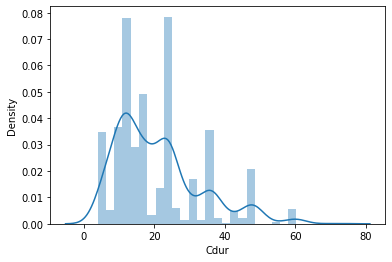

In [76]:
# checking the distribution of data in feature 'Cdur' 

sns.distplot(data_1['Cdur'])
plt.show()

Interpretation:

The above plot shows asymmetric distribution of data in feature 'Cdur'. We will later check the distribution using the values in the created feature, 'pctile_dur' that will show the distribution as per the percentile values in 'Cdur'. However, it is evident in the plot that the data do not follow Gaussian distribution as it is skewed to the right. 

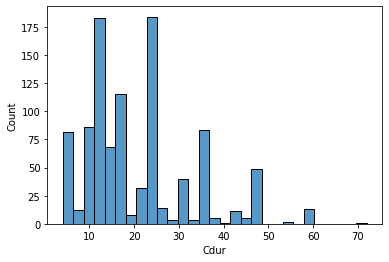

In [77]:
sns.histplot(data_1['Cdur'])

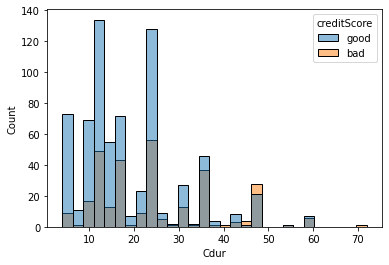

In [78]:
# checking the distribution of data in 'Cdur' w.r.t. target variable, 'creditScore'

sns.histplot(x = 'Cdur', data = data_1, hue = 'creditScore')

Interpretation:

After checking the distribution of data w.r.t. target feature, 'creditScore', it is observed that most of the loans claimed as 'good' in the given dataset have the duration in the range between 1 to 24 months. The bad loans are in the range between 1 to 35 months. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


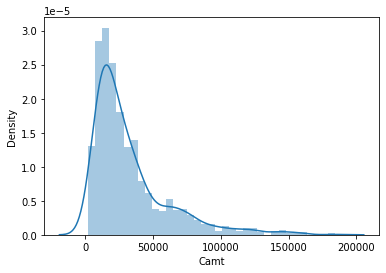

In [79]:
# checking the distribution of data in feature 'Camt' 

sns.distplot(data_1['Camt'])
plt.show()

Interpretation:

Above plot shows that the data in 'Camt' do not follow Gaussian distribution as the data is skewed to the right. For this feature, we will again analyse the distribution by using feature, 'pctile_amt' that contains the percentile values in 'Camt' 

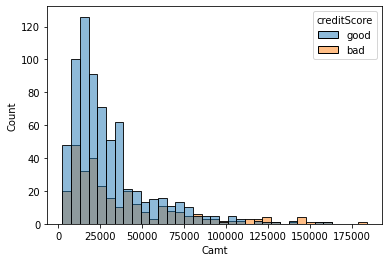

In [80]:
# checking the distribution in 'Camt' w.r.t. the target variable 'creditScore'

sns.histplot(x = 'Camt', data = data_1, hue = 'creditScore')

Interpretation:

The above plot shows that most of the loan amounts lie in the range between 0 to 38000 for both the loan categories. It is also important to mention again here that the values in feature 'Camt' have the problem of high cardinality. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


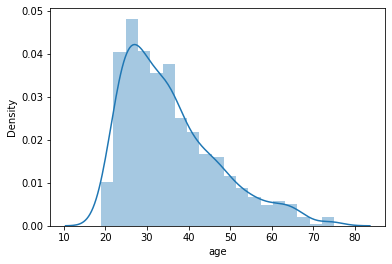

In [81]:
# checking the distribution of data in feature 'age' 

sns.distplot(data_1['age'])

Interpretation:

Above plot shows that data in the feature do not follow Gaussian distribution as the data is skewed to the right. 

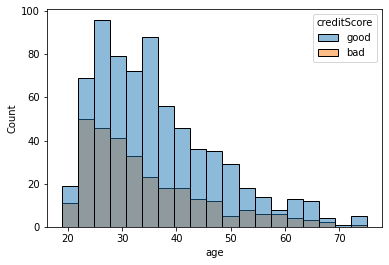

In [82]:
# now, we will check the distribution in feature 'age' w.r.t. target variable 'creditScore' 
# to understand the representation of bad loans

sns.histplot(x = 'age', data = data_1, hue = 'creditScore')


Interpretation:

The above plot shows that most of the bad loans exist for clients that are between 0 to 35 years in age. 

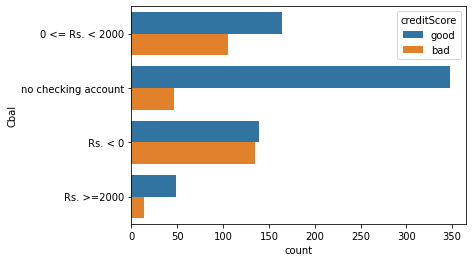

In [83]:
# checking the distribution of data in feature 'Cbal'

sns.countplot(y = 'Cbal', hue = 'creditScore', data = data_1)

Interpretation:

Above plot shows that the clients, who have no checking account are claimed to comprise of highest number of good loans. 

In addition, there is not much difference between two loan categories for clients, who have negative balance in their checking accounts. 



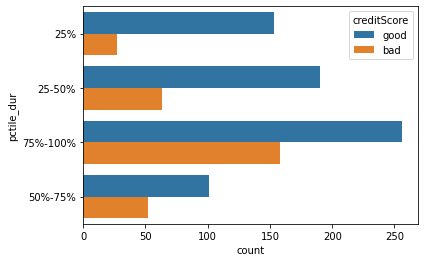

In [84]:
# checking the distribution of data in 'pctile_dur' that contains percentile values in 'Cdur' w.r.t. target variable, 'creditScore' 

sns.countplot(y = 'pctile_dur', hue = 'creditScore', data = data_1)

Interpretation:

Since the above plot contains percentile values in 'Cdur', the distribution of data in 'Cdur' is interpreted as follows:

values > 0 but < 12 comprise of lower 25% of the data

values >= 12 but < 18 comprise of first 25%-50% of the data

values >= 18 but < 24 comprise of 50%-75% of data

values >= 24 comprise of 75%-100% of data

The above plot shows that highest number of good loans are taken for a duration of more than 24 months or 2 years. Highest number of bad loans are also taken for a duration of more than 24 months in the 75%-100% range. Lowest number of bad loans are claimed to be taken for a period of less than 12 months or 1 year. 


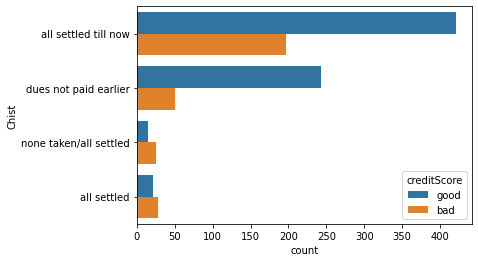

In [85]:
# checking the distribution of data in 'Chist' w.r.t. the target variable, 'creditScore'

sns.countplot(y = 'Chist', hue = 'creditScore', data = data_1)


Interpretation:

Above plot shows that most of the loans that are claimed as 'good' are settled by the clients till now. This holds true for bad loans too. There is not much of a difference between the two loan categories for clients, who have settled all the loans. It was pointed out earlier that the given dataset has failed to properly describe the payments of previous loans by the given clients. A loan, whether settled or not settled is not enough to study the behavior of clients when it comes to estimating their likelihood to default or not default on loan payments. The online investigation of relevant articles have enabled us to understand that type of previous loans and previous loan amounts are crucial for more accurate identification of client behavior when it comes to estimating the default likelihood on loan payments as it is possible that the type of current loans of clients given in this dataset is totally different from their previous loans. If this happened to be true, it is again ambiguous to understand the client's propensity to make scheduled loan payments when the current loan type is different from the past loan type as the credit risks involved for the lending institution are different when the same client is availing the loan. Please check this link for details: https://www.investopedia.com/terms/c/credit_score.asp



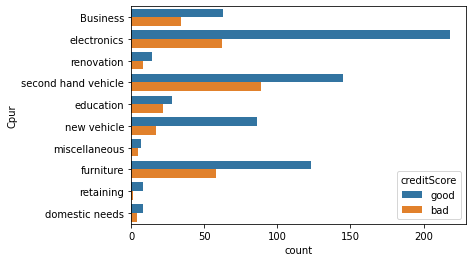

In [86]:
# checking the distribution of data in 'Cpur' w.r.t. the target variable, 'creditScore'

sns.countplot(y = 'Cpur', hue = 'creditScore', data = data_1)

Interpretation:

Above plot shows that most of the likely bad loans are taken by the clients for the purpose of used vehicles in the given dataset. 

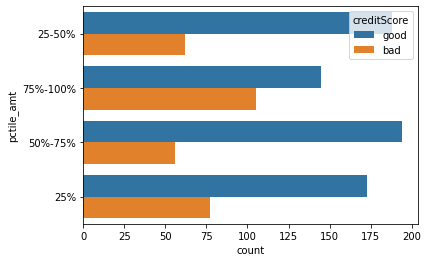

In [87]:
# checking the distribution of data in 'pctile_amt', which contains percentile values in 'Camt', w.r.t. target variable, 'creditScore'

sns.countplot(y = 'pctile_amt', hue = 'creditScore', data = data_1)


Interpretation:

The percentile values in 'Camt' can be understood in the following manner:

values > 0 and values < 13535 - 25th percentile

values >= 13535 and values < 23075 - 25th-50th percentile

values >= 23075 and values < 39602 - 50th-75th percentile

values >= 39602 - 75th-100th percentile

Above plot shows that most of the likely bad loans are taken by the clients for the amount greater than Rs. 39602 and both least likely bad loans and most likely good loans are taken by clients for amount ranging between Rs. 23075 and Rs. 39602. 

Again, we cannot ascertain how the data collector has reached this conclusion in the given dataset when there are no clear details about the income of clients as values in 'Cbal' and 'Sbal' are presented in the form of range. We also do not know about the disposable income that has been used to calculate the instalment rate in the given dataset. Although the data collector has mentioned the details of other properties in order to indicate that the clients have the capacity to make scheduled loan payments to the lending institution, the data collector has failed to provide the collateral details. The information about previous loan types, previous loan amounts, interest rates and levels of existing credits(only number of existing credits is provided) is also not mentioned in the dataset that are important to reach a valid conclusion for classification of loans. 

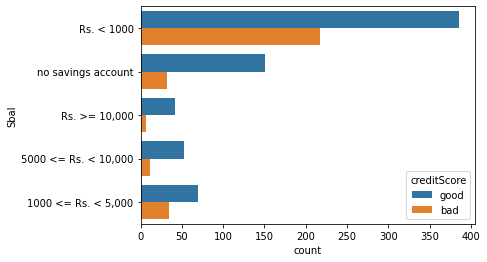

In [88]:
# checking the distribution of data in 'Sbal' w.r.t. target variable, 'creditScore'

sns.countplot(y = 'Sbal', hue = 'creditScore', data = data_1)


Interpretation:

Above plot shows that the clients are likely to both default and not default on loans in highest numbers when the amount in their savings account is less than Rs. 1000. The lowest number of likely bad loans are observed for the clients, who have greater than or equal to Rs. 10000 in their savings accounts. 

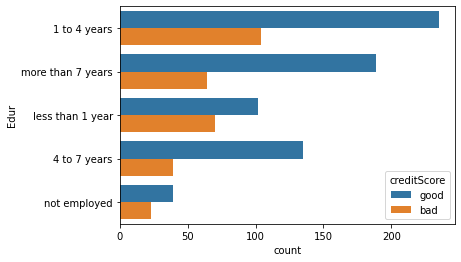

In [89]:
# checking the distribution of data in 'Edur' w.r.t. target variable, 'creditScore'

sns.countplot(y = 'Edur', hue = 'creditScore', data = data_1)

Interpretation:

Highest number of both defaulters and non-defaulters are clients, who have worked for a period of 1 to 4 years and lowest number of both defaulters and not defaulters have not worked. 

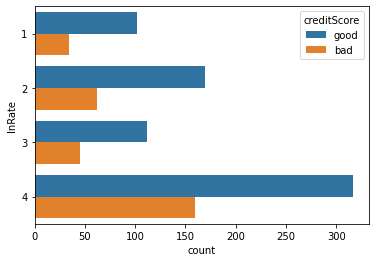

In [90]:
# checking the distribution of data in 'InRate' w.r.t. target variable, 'creditScore'

sns.countplot(y = 'InRate', hue = 'creditScore', data = data_1)

Interpretation:

Highest number of defaulters and non-defaulters have taken loans from the lending institution at an instalment rate of 4%. 

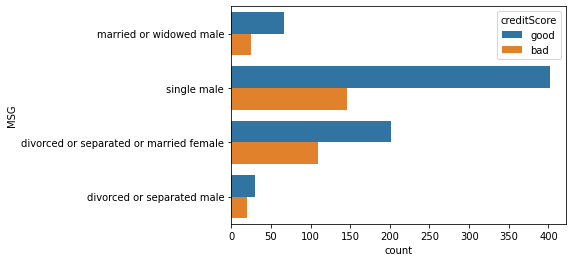

In [91]:
# checking the distribution of data in 'MSG' w.r.t. target variable, 'creditScore'

sns.countplot(y = 'MSG', hue = 'creditScore', data = data_1)


Interpretation:

Above plot shows that highest number of both defaulters and non-defaulters are single males and lowest number of both defaulters and non-defaulters are divorced or separated males. 

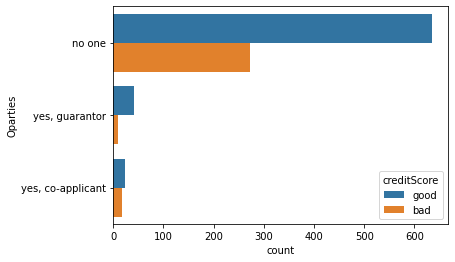

In [92]:
# checking the distribution of data in 'Oparties' w.r.t. target variable, 'creditScore'

sns.countplot(y = 'Oparties', hue = 'creditScore', data = data_1)


Interpretation:

Above plot shows that highest number of both defaulters and non-defaulters have availed loans from the lending institution with no co-applicants/guarantors in the given dataset. 

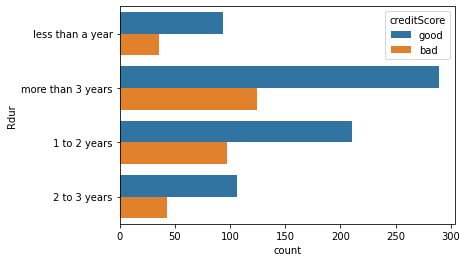

In [93]:
# checking the distribution of data in 'Rdur' w.r.t. target variable, 'creditScore'

sns.countplot(y = 'Rdur', hue = 'creditScore', data = data_1)


Interpretation:

Above plot shows that highest number of both defaulters and non-defaulters have stayed in their current residence for a period of more than 3 years and lowest number of both defaulters and non-defaulters have stayed in their current residence for less than a year in the given dataset. 

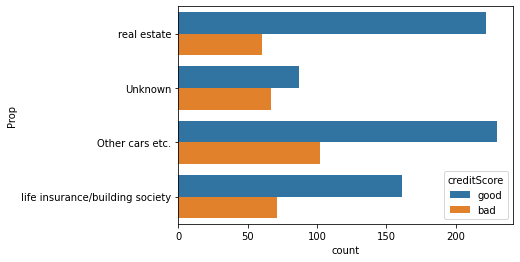

In [94]:
# checking the distribution of data in 'Prop' w.r.t. target variable, 'creditScore'

sns.countplot(y = 'Prop', hue = 'creditScore', data = data_1)


Interpretation:

Above plot shows that clients, who have other cars, etc. as properties comprise of the highest number of defaulters and non-defaulters in the given dataset. However, clients, who have unknown properties comprise of the lowest number of defaulters and non-defaulters in the given dataset.


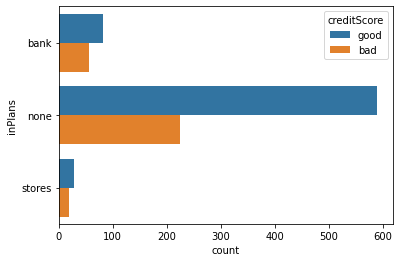

In [95]:
# checking the distribution of data in 'inPlans' , w.r.t. target variable, 'creditScore'

sns.countplot(y = 'inPlans', hue = 'creditScore', data = data_1)


Interpretation:

Above plot shows that the highest number of both defaulters and non-defaulters have 'none' instalment plans and lowest number of both defaulters and non-defaulters have instalment plans in stores. 


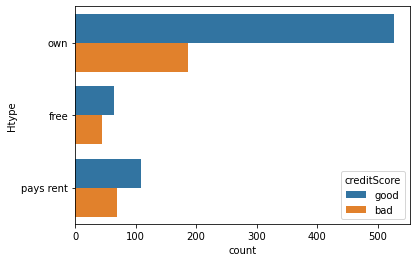

In [96]:
# checking the distribution of data in 'Htype' w.r.t. target variable, 'creditScore'

sns.countplot(y = 'Htype', hue = 'creditScore', data = data_1)


Interpretation:

Above plot shows that the highest number of both defaulters and non-defaulters have their own house while lowest number of defaulters and non-defaulters are living for free as per the values in the given dataset. 

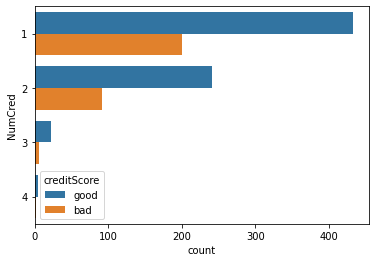

In [97]:
# checking the distribution of data in 'NumCred' w.r.t. target variable, 'creditScore'

sns.countplot(y = 'NumCred', hue = 'creditScore', data = data_1)


Interpretation:

Above plot shows that the highest number of both defaulters and non-defaulters have one existing credit. In contrast, lowest number of defaulters and non-defaulters have four existing credits in the given dataset. However, it is not mentioned whether the clients have had these existing credits from the lending institution, Cautious plc or from other institution. 

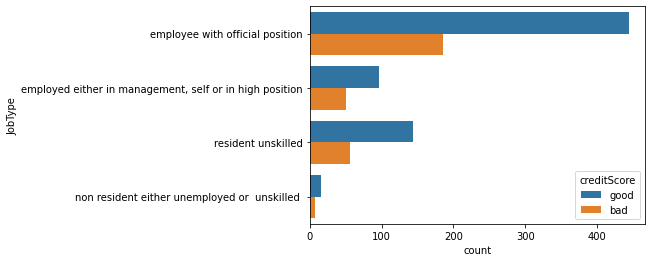

In [98]:
# checking the distribution of data in 'JobType' w.r.t. target variable, 'creditScore'

sns.countplot(y = 'JobType', hue = 'creditScore', data = data_1)

Interpretation:

Above plot shows that the highest number of likely defaulters and non-defaulters are labeled as employees with official position. In contrast, the lowest number of defaulters and non-defaulters are either unemployed or unskilled non-resident clients in the given dataset. 

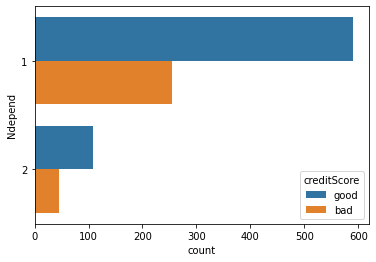

In [99]:
# checking the distribution of data in 'Ndepend' w.r.t. target variable, 'creditScore'

sns.countplot(y = 'Ndepend', hue = 'creditScore', data = data_1)


Interpretation:

Above plot shows that higher number of defaulters and non-defaulters have only one dependent while rest of the defaulters and non-defaulters have two dependents in the dataset. 

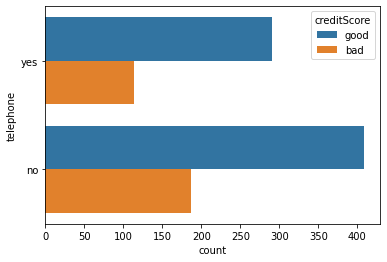

In [100]:
# checking the distribution of data in 'telephone'  w.r.t. target variable, 'creditScore'

sns.countplot(y = 'telephone', hue = 'creditScore', data = data_1)


Interpretation:

Above plot shows that higher number of defaulters and non-defaulters in the given dataset have no telephone number but rest of the defaulters and non-defaulters do have a telephone number. 

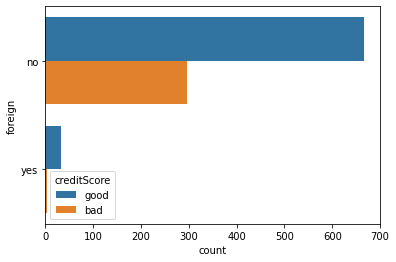

In [101]:
# checking the distribution of data in 'foreign' w.r.t. target variable, 'creditScore'

sns.countplot(y = 'foreign', hue = 'creditScore', data = data_1)


Interpretation:

Above plot shows that higher number of both defaulters and non-defaulters are not working abroad but lower number of defaulters and non-defaulters are working abroad. 

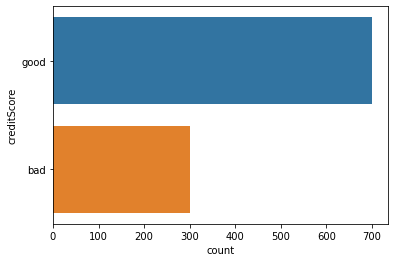

In [102]:
# checking the distribution of data in the target variable, 'creditScore' in the given dataset

sns.countplot(y = 'creditScore', data = data_1)


Interpretation:

There are higher number of likely non-defaulters than defaulters in the given dataset. 

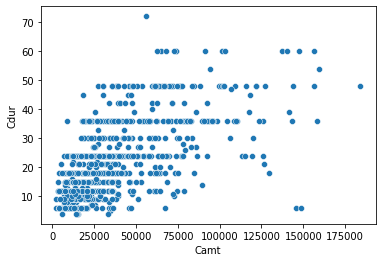

In [103]:
# now, we will visualize the relation between loan amount in 'Camt' and loan duration in 'Cdur' as we stated earlier that
# loan duration is fixed after information about the loan amount and interest rate. 
# Instalment rate depends on loan amount, interest rate and tenure of the loan. 
# In the given dataset, we have instalment rate, loan duration and loan amount. However, we are unable to connect all of these features to 
# make a coherent meaning as the information about loan interest rates is not available. Moreover, instalment rate is expressed as a 
# percentage of disposable income but we are not informed about the mode of instalments whether monthly, yearly, or quarterly. 
# Also, there are no details about disposable income. 

# checking the relation between loan amount, 'Camt' and loan duration, 'Cdur' in the given dataset
sns.scatterplot(x = 'Camt', y = 'Cdur', data = data_1)


Interpretation:

Above plot shows moderate positive linear relationship between loan amount and loan duration. This relation was also observed in the correlation between these two features. 

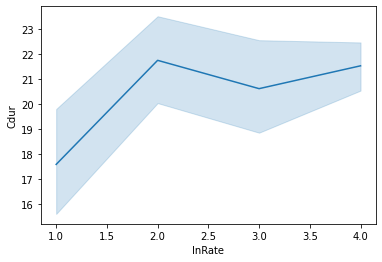

In [104]:
# checking the relation between instalment rate in 'InRate' and loan duration in 'Cdur' 
sns.lineplot(x = 'InRate', y = 'Cdur', data = data_1)



Interpretation:

Above plot shows first a positive relation between loan duration and instalment rate - when loan duration increases, instalment rate increases. Then, it is observed that there is negative relation between loan duration and instalment rate when loan duration is greater than 21 months and instalment rate is greater than 2 percent. The trend is again observed to become positive for instalment rates greater than 3 percent and loan duration around 21 months. 

However, we cannot infer an absolute relation between these features because loan duration itself depends on loan amount and instalment rate is expressed as a percentage of disposable income and that income could vary for clients given in the dataset. Also, we do not know whether instalment rate is applied monthly or yearly. 

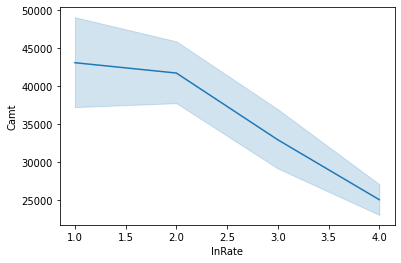

In [105]:
# checking the relation between instalment rate in 'InRate' and loan amount in 'Cdur' 
sns.lineplot(x = 'InRate', y = 'Camt', data = data_1)

Interpretation:

Above plot shows that loan amount is close to Rs. 43000 and does not change much when the instalment rate is between 1 percent and 2 percent. However, the loan amount varies from Rs. 43000 to Rs. 26000 when the instalment rate is between 2 percent and 4 percent. Again, this plot does not give sufficient information as we had stated earlier that instalment rate is in relation to the disposable income, which is not available in the dataset and can vary for distinct clients.

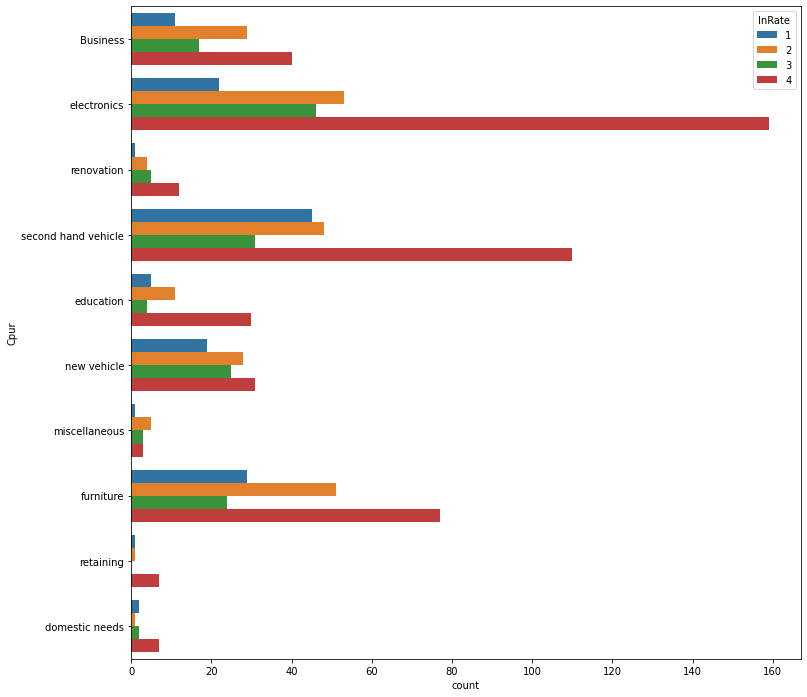

In [106]:
# now, we will check whether the instalment rate is also influenced by the purpose of loans availed by the clients

# checking the relation between instalment rate in 'InRate' and loan purpose in 'Cpur' 
plt.figure(figsize = (12, 12))
sns.countplot(y = 'Cpur', hue = 'InRate', data = data_1)

Interpretation:

Above plot shows that for all the type of loans given in the dataset, instalment rate is either 4% or 2% of the client's disposable income in most of the cases. However, we could have been able to interpret more accurate inference if we had details of disposable income in the given dataset. The given datset is found to be incomplete without essential details that are required to classify the likely bad loans more accurately. 

In [107]:
# after visualizing the representation of features and label separately and checking the relation between them, we will focus back on the 
# values in the dataset and apply proper processing techniques to make the dataset suitable for classification of bad loans 

# checking the data types in data_1 dataframe

data_1.dtypes

Cbal           object
Cdur            int64
pctile_dur     object
Chist          object
Cpur           object
Camt            int64
pctile_amt     object
Sbal           object
Edur           object
InRate          int64
MSG            object
Oparties       object
Rdur           object
Prop           object
age             int64
inPlans        object
Htype          object
NumCred         int64
JobType        object
Ndepend         int64
telephone      object
foreign        object
creditScore    object
dtype: object

High Cardinality in feature 'Camt':

---

In the given dataset, 'age', 'Camt' and 'Cdur' are numerical variables and rest are categorical variables as we had observed that the unique values in some of the features are few integral values and these values are ordinal in nature. 

However, the feature 'Camt' that refers to the loan amount has the problem of high cardinality. Please check the following link that presents a similar problem of a quantitative feature with high cardinality. There are unique values equal to length of feature column. 

Please check this link: https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html?highlight=high%20cardinality. 

However, loan amount is an important feature because it is relevant for predicting the default likelihood of clients in the actual settings in financial lending institutions. Hence, the feature cannot be dropped from the dataset with respect to this particular case study problem on classification of bad loans. 



---

Choice of Suitable Metric for Evaluating the Classification of Bad Loans:

---

In this particular case study, the major goal is to enable the lending institution, Cautious plc in making more informed decisions in disbursement of loans based on the insights from the classification model for bad loans. Since there are two categories in the label of given dataset that are required to be classified and the focus of this case study is on classification of bad loans, bad loans will correspond to "positive class" and good loans will correspond to "negative class".  The basic evaluation of classification model is done first by making a confusion matrix that consists of 4 values, True Positive (TP), False Positive (FP) or Type I error, True Negative (TN), and False Negative (FN) or Type II error. Here, positive class will refer to the category that we are focusing on in this case study i.e.; bad loans and negative class will refer to good loans. The classification model that we choose to suggest to the lending institution should be able to minimize both the false positives and the false negatives in order to have better classification of bad loans. 


Meaning of attributes in confusion matrix in this classification problem:
__________________________________________________________________________
True positive: Loans that are actually bad are correctly classified by the model as bad loans.

False positive: Loans that are actually good are erroneously classified as bad loans by the model. If more good loans are classified as bad loans by the model and lending institution adopts this model for making decisions about loan disbursements, then the institution would end up losing considerable opportunities for making revenue. 

True negative: In this case, loans that are actually good are correctly classified by the model as good loans. 

False Negative: Loans that are actually bad are erroneously classified as good loans by the model. Such cases can also affect the revenue of lending institution because if the model is adopted the institution will disburse loans to clients that will default on the loan payments. 

Since we have to minimize both false positives and false negatives for better classification of bad loans, it can be achieved by increasing precision and recall respectively. However, the cost of false negatives is greater than the cost of false positives for the lending institution in this case study. Thus, we would prefer classification models with ability to better reduce false negatives to false positives. 

Precision = TP/(TP + FP) - thus, increase in precision implies decrease in false positives

Recall or Sensitivity = TP / (TP + FN) - thus, increase in recall or sensitivity implies decrease in false negatives. 

However, issues can still arise when we choose precision and recall as the metrics in the classification. The two categories in the label or target variable that are required to be classified are labeled as 0 and 1 (for good loans and bad loans respectively) and the classification algorithm predicts bad loans on the basis of probability that observations are close to 0 or negative cases and probability that observations are close to 1 or positive cases. Thus, the analyst has to select a probability value as classification threshold for classifying positive and negative cases. This approach can result in two kinds of discrepancies that influence the better evaluation of classification model for bad loans. One kind of discrepancy is higher precision and lower recall values and another kind of discrepancy is lower precision and higher recall values. Any one of these discrepancies if present, would not allow us in achieving the objectives of our analysis to build a model with higher recall and higher precision values for better classification of bad loans. 

F1 Score, a metric that is harmonic average of Precision and Recall is advised to be used in cases in which the balance between the values of Precision and Recall is required. Please check this link for details - https://www.analyticsvidhya.com/blog/2020/10/how-to-choose-evaluation-metrics-for-classification-model/ . Hence, we will use F1 Score as metric for evaluating the classification of bad loans. In addition, ROC/AUC Curve can also enable us in comparing the models each built by using a distinct classification threshold. But, F1 score can allow for better balance to achieve high precision and high recall values in the given case study problem. 


---

Baseline Classification of Bad Loans using Repeated Stratified K-fold Cross Validation:

---

In the given dataset, it is claimed that 70 percent of the loans are likely good loans and rest of the 30 percent loans are likely bad loans. Using K-fold cross validation algorithm would not be appropriate as each of the folds or K values to which the distinct portions from the complete dataset are allocated may not get sufficient number of examples or observations from both the classes or loan categories in the target variable. Hence, Repeated Stratified K-fold Cross Validation algorithm is more appropriate for classification of bad loans in the given dataset. 

In [108]:
# before carrying out Repeated Stratified K-fold Cross Validation, we will prepare the dataset by first mapping the categorical features 
# by using One-Hot Encoder algorithm for classification of bad loans. 
# This approach is advised for implementation because it allows the classification model to learn different weights 
# for each unique value in a categorical feature without being misled by manual encoding of categorical features by ordered numeric values 


In [109]:
# checking the data types of features and label in dataframe

data.dtypes

Cbal           object
Cdur            int64
Chist          object
Cpur           object
Camt            int64
Sbal           object
Edur           object
InRate          int64
MSG            object
Oparties       object
Rdur           object
Prop           object
age             int64
inPlans        object
Htype          object
NumCred         int64
JobType        object
Ndepend         int64
telephone      object
foreign        object
creditScore    object
dtype: object

One-Hot encoding can be carried out on features and label that are of 'object' data types. Also, quantitative variables have different scales and hence, these variables are required to be scaled. 

In [110]:
# selecting the variables that require one-hot encoding in the given dataset and in case of target categorical variable
# bad loans will be encoded as 1 and rest of the loans will be encoded as 0 

encode_var = ['Cbal', 'Chist', 'Cpur', 'Sbal', 'Edur', 'MSG', 'Oparties', 'Rdur', 'Prop', 'inPlans', 'Htype', 'JobType', 'telephone', 'foreign']

In [111]:
# getting numeric features as a list 

num_var = ['Cdur', 'Camt', 'InRate', 'age', 'NumCred', 'Ndepend']

In [112]:
# first, we will make a copy of the original dataframe and then separate the dataset into features and label

iit_var = data.copy(deep = True)

In [113]:
# separating the features and label in the dataset

feat_var, tar_var = iit_var.drop(['creditScore'], axis = 1), iit_var['creditScore']

In [114]:
# importing necessary packages for one-hot encoding and column transformation

from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler 

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

In [115]:
# transforming the categorical and numeric features in feat_var dataframe

num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

cat_transformer = Pipeline(steps = [('encoder', OneHotEncoder(handle_unknown= 'ignore'))])


In [116]:
# now, applying the numerical and categorical transformers to the ColumnTransformer method 

columnTransformer = ColumnTransformer(transformers = [('num', num_transformer, num_var), ('cat', cat_transformer, encode_var)])

In [117]:
# fitting the column transformers to feat_var that contains features of the dataset given in this case study

feat_var = columnTransformer.fit_transform(feat_var)

In [118]:
# now, we will encode the target variable, 'creditScore' with 0 and 1 values 

tar_list = []
for i in tar_var.index:
  if tar_var[i] == 'bad':
    tar_list.append(1)
  if tar_var[i] == 'good':
    tar_list.append(0)


[0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,


In [119]:
# converting tar_list into series and changing the values in tar_var 
tar_ser = pd.Series(tar_list)

tar_var = tar_ser

In [120]:
# checking the observations in tar_var

tar_var.head()

0    0
1    0
2    1
3    1
4    0
dtype: int64

In [121]:
# importing the packages for cross-validation and Repeated Stratified K-fold algorithm and classification model evaluation 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.metrics import make_scorer

# importing metric F1 score to have better balance balance between precision and recall for better classification of bad loans
from sklearn.metrics import f1_score

# defining a function for evaluating the classification model for bad loans built using Repeated Stratified K-fold algorithm 

def evaluate_model(feat_var, tar_var, model):
  cross_val = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
  # defining the metric for classification model. we stated earlier that F1 score will be more appropriate in this case study for better classification 
  # of bad loans
  metric = make_scorer(f1_score)
  scores = cross_val_score(model, feat_var, tar_var, scoring = metric, cv = cross_val, n_jobs = -1)
  return scores

# in the given case study problem, we will first create a model that classifies bad loans that have less number of examples in the dataset
# to establish a greater recall score, which is our major objective for this analysis, and baseline precision score in which we will set the value of 
# 'constant' argument as 1, which refers to the category of bad loans. 

# importing necessary packages
from sklearn.dummy import DummyClassifier


In [122]:
# Using Repeated Stratified K-fold algorithm for building the model an then using the metric 'F1 score' for evaluation is an approach 
# to observe the improvements in the classification performance 

# defining the model
model = DummyClassifier(strategy='constant', constant=1)

# evaluating the model 
scores = evaluate_model(feat_var, tar_var, model)

In [123]:
# checking the performance of the classification model for bad loans

print('Mean F1: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean F1: 0.462 (0.000)


The output of above code expression gives us the baseline performance for classification of bad loans. If later models give a performance greater than 0.462, then they are an improvement over the baseline classification model. However, if their performance in terms of F1 score is less than 0.462, then it does not suggest an improvement. 

In [124]:
# we can also evaluate the classification model by focusing more on recall/sensitivity than on precision as higher recall or sensitivity values 
# means that the false negatives have decreased and that suggests the lending institution won't offer loans to clients, which are likely to be defaulters 
# but are incorrectly classified as likely non-defaulters. In order to achieve this aim, the metric, F-beta metric with value of beta as 2 will be used. 

from sklearn.metrics import fbeta_score

# defining a function for fbeta_score 

def f2(y_true, y_pred):
	return fbeta_score(y_true, y_pred, beta=2)
 
# defining another function for evaluating the classification model 
def evaluate_model_1(feat_var, tar_var, model):
  cross_val = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
  # defining the metric for classification model. we stated earlier that F1 score will be more appropriate in this case study for better classification 
  # of bad loans
  metric = make_scorer(f2)
  scores_val = cross_val_score(model, feat_var, tar_var, scoring = metric, cv = cross_val, n_jobs = -1)
  return scores_val


In [125]:
# defining the model
model = DummyClassifier(strategy='constant', constant=1)

# evaluating the model 
scores_val = evaluate_model_1(feat_var, tar_var, model)

In [126]:
# checking the performance of the classification model for bad loans

print('Mean F2: %.3f (%.3f)' % (np.mean(scores_val), np.std(scores_val)))

Mean F2: 0.682 (0.000)


Interpretation:

The output of above code expression gives F2 score as 0.682, which is better than earlier F1 score of 0.462. This can be becuase there is more emphasis on minimizing false negatives that could inform the decision making at the lending institution to avoid offering loans to likely defaulters, who are incorrectly classified as good. 

In [127]:
# now, we cannot treat high cardinality values in 'Camt' as it is numerical data and 'Camt' is an important feature with respect to this case study problem.
# Hence, this feature cannot be dropped from the dataset. However, we can remove rows from the dataset that have contradictory information such as that earlier 
# found in 'Edur' and 'JobType' to build a classification model again for bad loans
# However, we also stated earlier that use of the given dataset to build a classification model will not find 
# significant business applications in lending institution as the dataset lacks important features,details and has errors such as contradictory information

# selecting the rows in the dataset with contradictory values in 'Edur' and 'JobType' and removing them
sel_rows = iit_var.loc[(iit_var['Edur'].str.startswith('not')), :]



Checking the contradictory information in sel_rows by checking the counts of unique values in both 'Edur' and 'JobType' features

In [128]:
# checking the counts of unique values in 'Edur' in sel_rows

sel_rows['Edur'].value_counts()


not employed    62
Name: Edur, dtype: int64

In [129]:
# now, checking the counts of unique values in 'JobType' in sel_rows

sel_rows['JobType'].value_counts()

employed either in management, self or in high position    33
non resident either unemployed or  unskilled               16
employee with official position                            12
resident unskilled                                          1
Name: JobType, dtype: int64

Observation: 

The output of above two code expressions shows that 45 rows contain contradictory information and are required to be removed from the dataset before building the classification model. In each of these 45 rows, the value in 'Edur' suggests that the client is not employed and it is completely opposite to the corresponding values in 'JobType' that suggest that the client is employed. This discrepancy in information further raises doubts on the data recording and collection procedures utilized by the data collector to create the dataset given in this case study problem. Thus, we will remove these 45 rows and build a classification model to check whether there are any improvements in the performance w.r.t. F1 score. However, the better performance of classification model is still doubtful because the justification for making the claims whether a loan is likely to be bad or good is not clearly understood from the given features and is also not in accordance with the industry practices followed to measure credit risk. 

In [130]:
# removing rows with contradictory information from the iit_var dataframe

iit_var.drop(iit_var[(iit_var['Edur'].str.startswith('not')) & (iit_var['JobType'].str.startswith('employed'))].index, inplace = True)

The above code expression should have removed 33 rows from the dataset with contradictory information. The rest of 12 rows are also required to be removed from the dataset.  

In [131]:
# verifying whether the rows are removed from the dataframe

len(iit_var.loc[((iit_var['Edur'].str.startswith('not')) & (iit_var['JobType'].str.startswith('employed'))), :])

0

The output of above code expression shows that all the 33 rows are removed. 

In [132]:
# removing the remaining 12 rows with contradictory information in 'Edur' and 'JobType' 

iit_var.drop(iit_var[(iit_var['Edur'].str.startswith('not')) & (iit_var['JobType'].str.startswith('employee'))].index, inplace = True)

In [133]:
# verifying whether the 12 rows are removed from the dataframe

len(iit_var.loc[((iit_var['Edur'].str.startswith('not')) & (iit_var['JobType'].str.startswith('employee'))), :])

0

The output of above code expression shows that the 12 rows are removed from the dataframe.

In [134]:
# now, separating the dataset into features and label 

feat_var1, tar_var1 = iit_var.drop(['creditScore'], axis = 1), iit_var['creditScore']


In [135]:
# transforming the categorical and numeric features in feat_var1 dataframe

num_transformer1 = Pipeline(steps = [('scaler', StandardScaler())])

cat_transformer1 = Pipeline(steps = [('encoder', OneHotEncoder(handle_unknown= 'ignore'))])


In [136]:
# categorical features 

encode_var = ['Cbal', 'Chist', 'Cpur', 'Sbal', 'Edur', 'MSG', 'Oparties', 'Rdur', 'Prop', 'inPlans', 'Htype', 'JobType', 'telephone', 'foreign']

In [137]:
# numerical features

num_var = ['Cdur', 'Camt', 'InRate', 'age', 'NumCred', 'Ndepend']

In [138]:
# now, applying the numerical and categorical transformers to the ColumnTransformer method 

columnTransformer_1 = ColumnTransformer(transformers = [('num', num_transformer1, num_var), ('cat', cat_transformer1, encode_var)])

In [139]:
# fitting the column transformers to feat_var1 that contains features of the dataset given in this case study

feat_var1 = columnTransformer_1.fit_transform(feat_var1)

In [140]:
# now, we will encode the target variable, 'creditScore' in tar_var1 with 0 and 1 values 

tar_list_1 = []
for i in tar_var1.index:
  if tar_var1[i] == 'bad':
    tar_list_1.append(1)
  if tar_var1[i] == 'good':
    tar_list_1.append(0)


[0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,


In [141]:
# converting tar_list_1 into series and changing the values in tar_var1
tar_ser_1 = pd.Series(tar_list_1)

tar_var1 = tar_ser_1

In [142]:
# building the classification model again by using Repeated Stratified K-fold cross validation and F1 score metric after removing 
# rows with contradictory information from the dataframe

# defining the model
model = DummyClassifier(strategy='constant', constant=1)

# evaluating the model 
scores = evaluate_model(feat_var1, tar_var1, model)

In [143]:
# checking the performance of the classification model for bad loans

print('Mean F1: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean F1: 0.456 (0.004)


The output of above code expression shows a decrease in value of F1 score from earlier value of 0.462. 

In [144]:
# defining the model
model = DummyClassifier(strategy='constant', constant=1)

# evaluating the model using F2-score metric
scores_val = evaluate_model_1(feat_var1, tar_var1, model)

In [145]:
# checking the performance of the classification model for bad loans

print('Mean F2: %.3f (%.3f)' % (np.mean(scores_val), np.std(scores_val)))

Mean F2: 0.677 (0.004)


Interpretation:

The output of above code expression shows that the value of F2 score has also decreased from 0.682 to 0.677. Although there is not much decrease in the value, the value of metric should increase from the previous one as the value of 1 is considered the best for each of the F1-scores and F2-scores. But, values close to 0 are considered the worst. 

**Very Important Point:**

In this case study problem, the given dataset is not imbalanced with respect to ratio of number of examples in each of the two loan classes respectively. However, bad loans themselves carry higher cost implications than good loans for the lending institution. Thus, the classification of bad loans in the given dataset presents a imbalanced classification problem in which the costs of false negative is much worse than false positive for the lending institution. In such imbalanced classification problems, **cost-sensitive learning** is advised. Please check the link for details: https://machinelearningmastery.com/cost-sensitive-learning-for-imbalanced-classification/ . 

Thus, in order to have sufficient representation from each of the classes of loan categories in the dataset and to account for their differential costs, "oversampling" from minority loan category that has relatively lower number of observations is required for building a better classification model that can result in less number of false negatives. In this specific case study problem, we will use SMOTEENN method that itself combines two methods:
1) SMOTE(Synthetic Minority Oversampling Technique) for oversampling from the minority class i.e.; bad loans and,
2) ENN (Edited Nearest Neighbors) for undersampling. It removes the samples close to the decision boundary that separates the two classes. We will also use LDA (Linear Discriminant Analysis) algorithm for carrying out dimensionality reduction in the dataset. 

It is also important to consider that the given dataset lacks important features, details and has inconsistent information that makes this dataset not suitable to build a classification model for bad loans and provide insights to Cautious plc, the lending insitution for use in its business applications.  


In [197]:
# importing necessary packages

from sklearn.model_selection import train_test_split as tts

from sklearn.metrics import classification_report

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from imblearn.combine import SMOTEENN

from imblearn.under_sampling import EditedNearestNeighbours

In [167]:
# first of all, we will tweak some of the numerical features by converting them into category as their values are ordinal in nature and are integers.
# These features are 'InRate', 'NumCred' and 'Ndepend' and they will be one-hot encoded after conversion into categorical data types

iit_var['InRate'] = iit_var['InRate'].astype('category')

iit_var['NumCred'] = iit_var['NumCred'].astype('category')

iit_var['Ndepend'] = iit_var['Ndepend'].astype('category')

encode_var1 = ['Cbal', 'Chist', 'Cpur', 'Sbal', 'Edur', 'InRate', 'MSG', 'Oparties', 'Rdur', 'Prop', 'inPlans', 'Htype', 'NumCred', 
               'JobType', 'Ndepend', 'telephone', 'foreign']

num_var1 = num_var = ['Cdur', 'Camt', 'age']

In [202]:
# separating the features and label in the dataframe 

feat_var2, tar_var2 = iit_var.drop(['creditScore'], axis = 1), iit_var['creditScore']

Next, we will one-hot encode the categorical variables and scale the numerical variables in feat_var2. The values in tar_var2, which is the label or target variable will be encoded as 0 and 1 for good and bad loans respectively. 

In [204]:
# transforming the categorical and numeric features in feat_var2 dataframe

num_transformer2 = Pipeline(steps = [('scaler', StandardScaler())])

cat_transformer2 = Pipeline(steps = [('encoder', OneHotEncoder(handle_unknown= 'ignore'))])

In [205]:
# now, applying the numerical and categorical transformers to the ColumnTransformer method 

columnTransformer_2 = ColumnTransformer(transformers = [('num', num_transformer2, num_var1), ('cat', cat_transformer2, encode_var1)])

In [206]:
feat_var2 = columnTransformer_2.fit_transform(feat_var2)

In [207]:
# now, encoding the values as 0 and 1 in tar_var2 dataframe

tar_list_2 = []
for i in tar_var2.index:
  if tar_var2[i] == 'bad':
    tar_list_2.append(1)
  if tar_var2[i] == 'good':
    tar_list_2.append(0)


In [208]:
# converting tar_list_2 into series and changing the values in tar_var2
tar_ser_2 = pd.Series(tar_list_2)

tar_var2 = tar_ser_2

In [209]:
# defining model for evaluation
model = LinearDiscriminantAnalysis()
# defining the data sampling
sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))

In [210]:
# importing necessary package
from imblearn.pipeline import Pipeline

# scale, then sample, then fit model
pipeline = Pipeline([('s', sampling), ('m',model)])

In [213]:
feat_var2 = feat_var2.toarray()

In [214]:
feat_train, feat_test, tar_train, tar_test = tts(feat_var2, tar_var2, random_state=42)

pipeline.fit(feat_train, tar_train) 

predictions = pipeline.predict(feat_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Getting the Metrics for the Classification of Bad Loans (Class 1)

In [216]:
# precision 

from sklearn import metrics

metrics.precision_score(tar_test, predictions)

0.41379310344827586

The output of above code expression gives the precision value or percentage of positive predictions or bad loan predictions that were correct. However, we are looking for higher recall values to minimize the false negatives, which could have more adverse effects on the revenue of the lending institution as bad loans are incorrectly classified as good loans. 

In [217]:
# recall

metrics.recall_score(tar_test, predictions)

0.8823529411764706

The output of above code expression shows a much higher recall value than precision value. We stated earlier that higher recall values will enable better classification of bad loans in this specific case study problem. 

In [218]:
# F1-score

metrics.f1_score(tar_test, predictions)

0.5633802816901409

The output of above code expression gives the F1-score or the harmonic average of precision and recall values. The value of F1-score is lower relative to the evaluation done earlier using Repeated Stratified K-fold cross-validation. However, it is important to have more emphasis or weightage on recall or sensitivity values as it could help in better classification of bad loans. Hence, we will also consider F2-score values. 

In [219]:
# F2-score

metrics.fbeta_score(tar_test, predictions, beta=2)

0.7194244604316546

The output of above code expression shows a very high value of F2-score i.e.; 0.719 in comparison to the previous value of 0.677. This value shows improvement in the classification performance. 

Summary:

This case study assignment is completed with the purpose of presenting the comprehensive aspects of the problem and the details of the given dataset to the reader without overlooking the suitability of the given dataset in classification of bad loans for use in business applications by Cautious plc. It is concluded that the given dataset lacks important features, details and presents inconsistent information that can raise doubts about the classification of bad loans. The extensive research about wider practices of lending institutions has supported this conclusion and relevant links are provided for reference in this assignment file. Furthermore, it is observed that there is no clear justification for making the claims whether a loan is likely to a good or bad with respect to the lack of complete information in the features given in the dataset. Although the classification model is built using the dataset to show the results of the predictions, it is doubtful whether the analysis performed using the given dataset is suitable for business applications in lending institution. 